# <center>Heart Attack Prediction</center>

## Table of Contents
1. [Data Load](#1)
    * 1.1 [Missing Values](#1_1)
    * 1.2 [Unique Values](#1_2)
2. [Univariate Exploratory Data Analysis](#2)
    * 2.1 [Numeric data](#2_1)
    * 2.2 [Categorical data](#2_2)
3. [Bivariate Exploratory Data Analysis](#3)
    * 3.1 [Numeric x Target variable](#3_1)
    * 3.2 [Categorical x Target variable](#3_2)
4. [Numeric variables among themselves](#4)
5. [Stripplots Numeric x Categorical](#5)
6. [Boxplots Numeric x Categorical](#6)
7. [Heatmap all variables](#7)
8. [Modeling Prep](#8)
    * [Dealing with outliers](#8_1)
    * [Distribution of Numeric Variables](#8_2)
9. [One-hot encoding](#9)
10. [Feature Scaling](#10)
11. [Model Training (variables removed)](#11)
    * 11.1 [Logistic Regression](#11_1)
    * 11.2 [Decision Trees](#11_2)
    * 11.3 [Support Vector Machine](#11_3)
    * 11.4 [Random Forest](#11_4)
    * 11.5 [XGBoost](#11_5)
    * 11.6 [Neural Net](#11_6)
12. [Model training using all variables](#12)
    * 12.1 [Logistic Regression](#12_1)
    * 12.2 [Decision Trees](#12_2)
    * 12.3 [Support Vector Machine](#12_3)
    * 12.4 [Random Forest](#12_4)
    * 12.5 [XGBoost](#12_5)
    * 12.6 [Neural Net](#12_6)


### Variable definitions in the Dataset

1. **Age**: Age of the patient
2. **Sex**: Sex of the patient
	* Value 0: Female
	* Value 1: Male
3. **cp**: Chest Pain type chest pain type
	* Value 1: typical angina
	* Value 2: atypical angina
	* Value 3: non-anginal pain
	* Value 0: asymptomatic
4. **trtbps**: resting blood pressure (in mm Hg)
5. **chol**: cholestoral in mg/dl fetched via BMI sensor
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
	* Value 0: normal
	* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. **thalach**: maximum heart rate achieved
9. **exng**: exercise induced angina (1 = yes; 0 = no) 
10. **oldpeak**: previous peak, ST Depression induced by exercise relative to rest
11. **slp**: Slope of ST Segment
	* Value 0: Downslope
	* Value 1: Flat
	* Value 2: upsloping
12. **caa**: number of major vessels (0-4) colored by flourosopy
13. **thall**: Thalium Stress Test result
	* Value 1: Fixed defect
	* Value 2: Normal
	* Value 3: reversable defect
14. **output**: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
#Required libraries for EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#split
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

#gridsearch
from sklearn.model_selection import GridSearchCV

#Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Activation, Add
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


## 1. Initial data load <a id="1">

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1.1 Missing values<a id="1_1">

In [5]:
df.isna().sum().to_frame().rename(columns={0:'Missing'})

Missing
age             0
sex             0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
output          0

In [6]:
import missingno

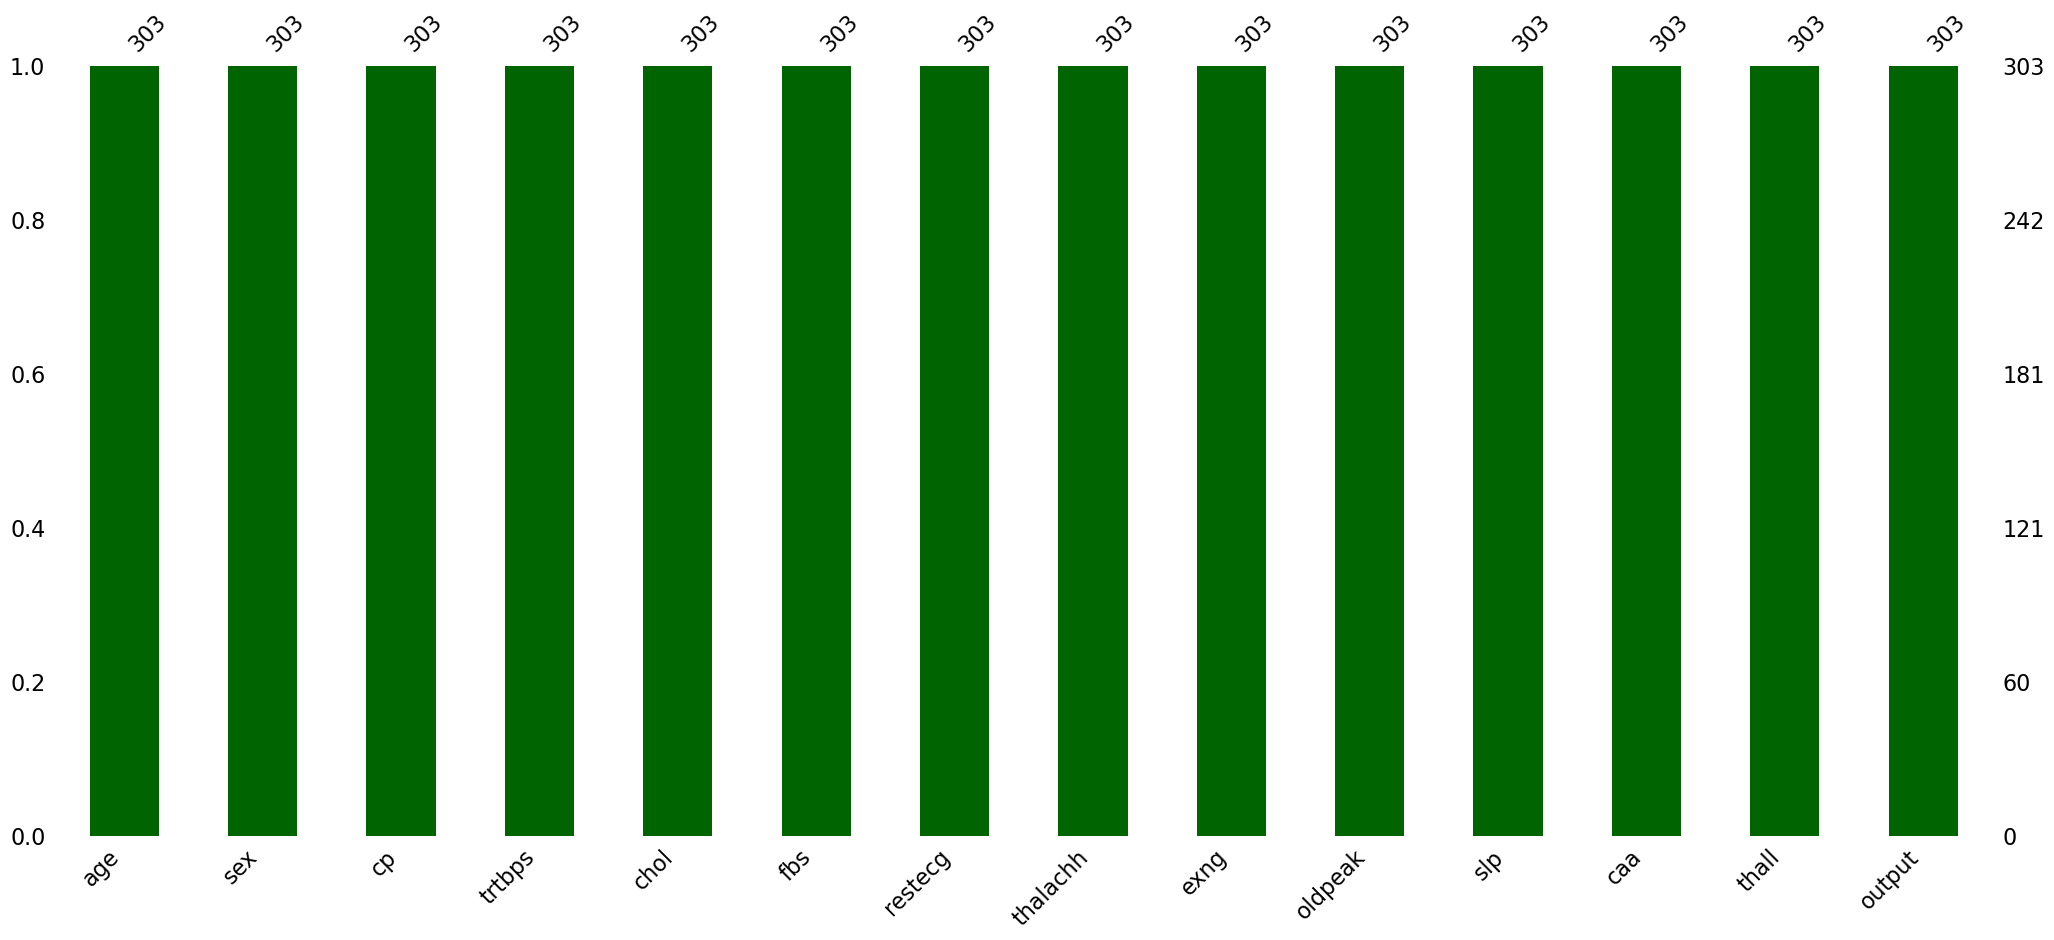

In [7]:
missingno.bar(df, color='darkgreen')
plt.show()

Missing values summary
* no missing values were detected, and double checked using missingno plot

### 1.2 Unique Values <a id="1_2">

In [8]:
uniques = []
for i in df:
    x = df[i].unique().shape[0]
    uniques.append(x)
pd.DataFrame(uniques, index=df.columns,columns=['Total Unique Values'])

Total Unique Values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
restecg                     3
thalachh                   91
exng                        2
oldpeak                    40
slp                         3
caa                         5
thall                       4
output                      2

## 2. Univariate EDA <a id="2">

### 2.1 Numeric data<a id="2_1">

In [9]:
NUMERIC = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
CATEGORICAL =[x for x in df.columns if x not in NUMERIC]

In [10]:
df[NUMERIC].describe()

age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [11]:
FIG_TILE = ['Age of Patient', 'Resting Blood Pressure', 'Cholesterol', 'Maximum Heart Rate Achieved', 'Previous Peak']

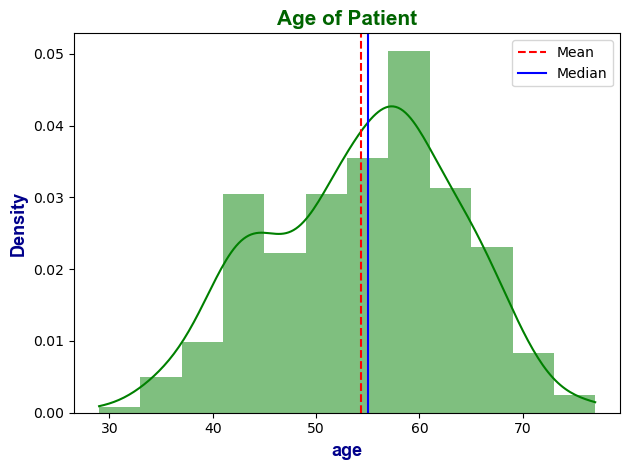

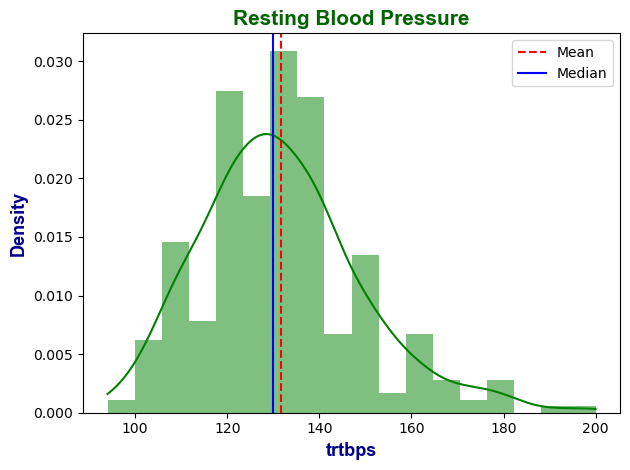

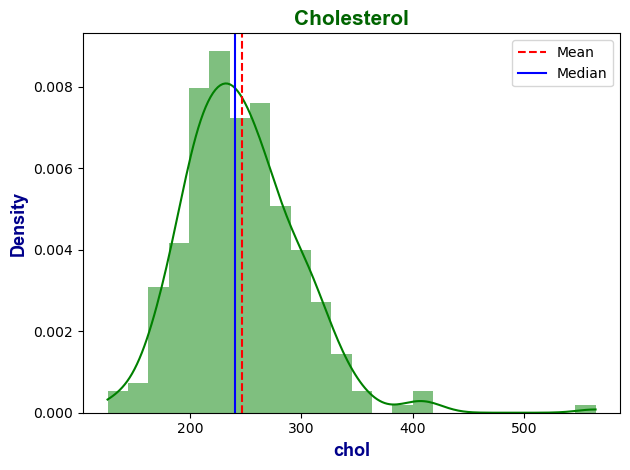

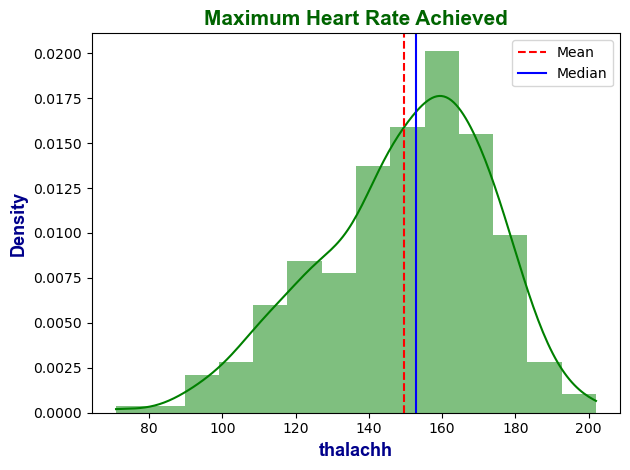

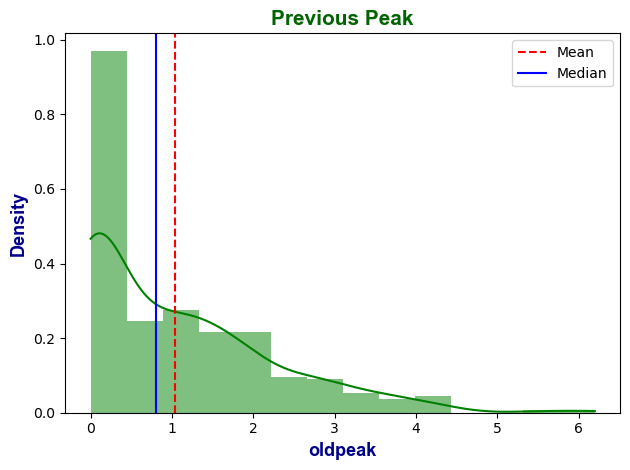

In [12]:
title_font = {'family': 'arial', 'color': 'darkgreen', 'weight': 'bold', 'size': 15}
axis_font = {'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i, x in zip(NUMERIC,FIG_TILE):
    sns.histplot(df[i], kde=True, stat='density', linewidth=0, color='g')
    plt.axvline(df[i].mean(), color='r', ls='--', label='Mean')
    plt.axvline(df[i].median(), color='b', ls='-', label='Median')
    plt.legend()
    plt.title(x, **title_font)
    plt.xlabel(i, **axis_font)
    plt.ylabel("Density", **axis_font)

    plt.tight_layout()
    plt.show()

* oldpeak variable is heavily skewed, might consider removing it from training.
* chol has some heavy right end outliers, also removal might be a good idea
* rest have some slight skewness but not that much

### 2.2 Categorical data <a id='2_2'>

In [13]:
CATEGORICAL

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [14]:
CATEGORICAL_NAMES = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar > 120mg/dl', 'Resting Electrocardiographic Results', 'Exercise Induced Angina',
                     'Slope of ST Segment', 'Number of Major Vessels Colored by Flourosopy', 'Thal rate', 'Greater chance of heart attack']

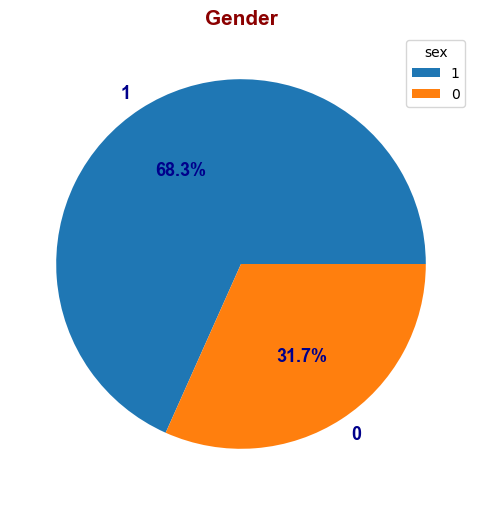

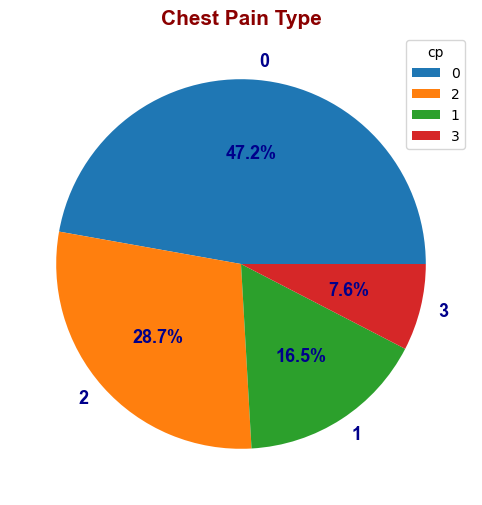

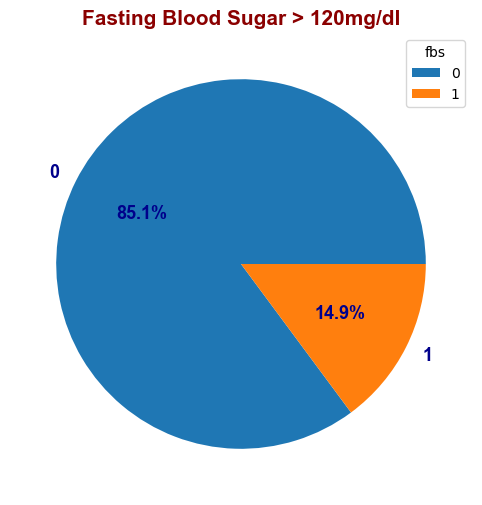

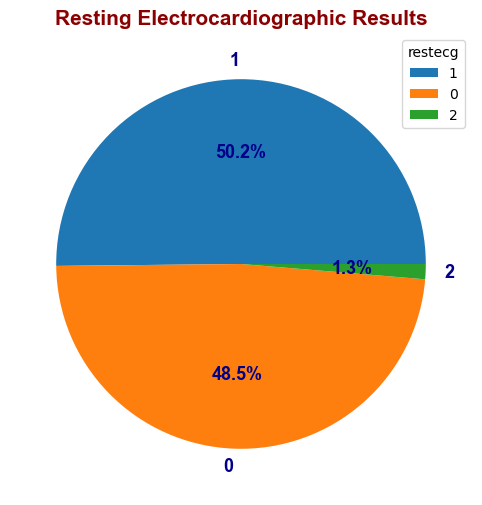

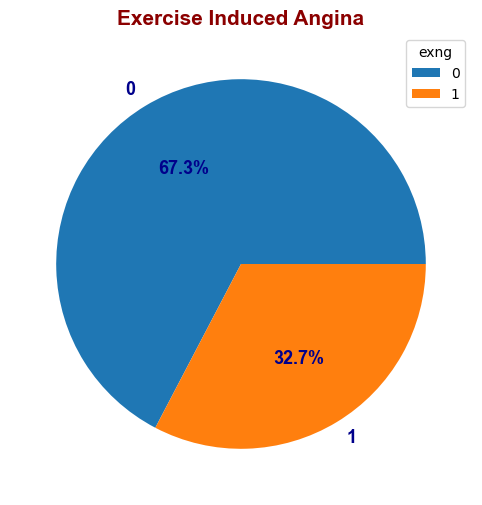

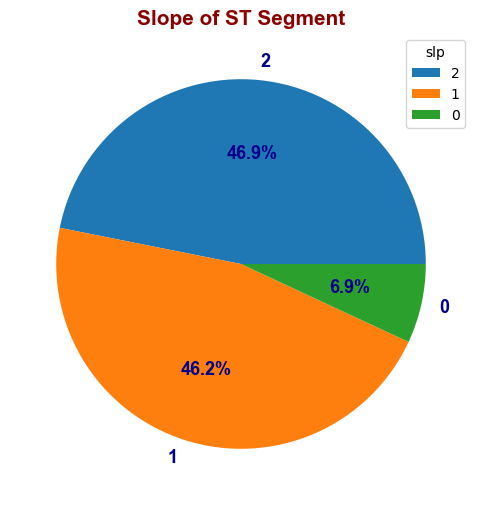

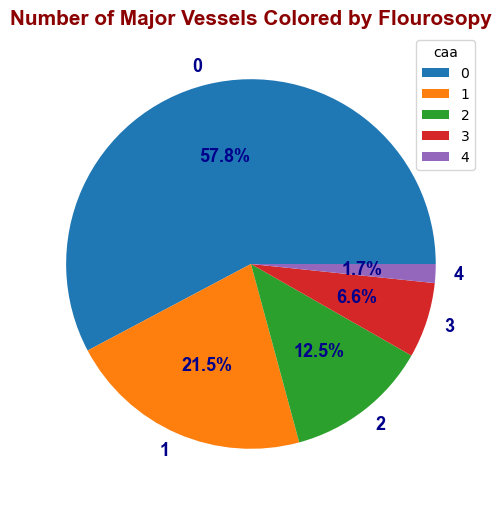

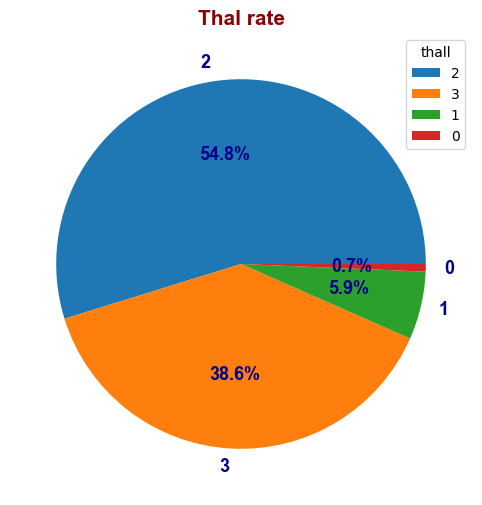

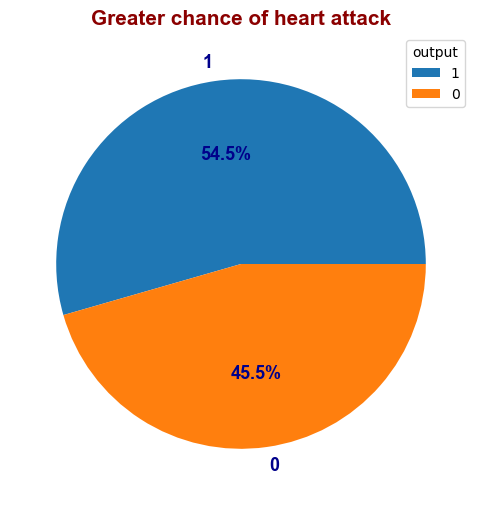

In [15]:
title_font = {'family':'arial', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font = {'family':'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i, x in zip(CATEGORICAL, CATEGORICAL_NAMES):
    fig, ax = plt.subplots(figsize=(10,6))

    counts = df[i].value_counts()
    ax.pie(counts, labels=counts.index, autopct=lambda x: f'{x:.1f}%', labeldistance=1.1,textprops=axis_font)
    ax.legend(title=i, loc='best')
    ax.set_title(x, **title_font)

* It appears there is null value for thal variable that is supposed to have 3 variables, 0 might be null.
* simialr issue for caa that has values 0-3, but there are some 4s in there that are nulls. 

In [16]:
df[df['thall']==0]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
48    53    0   2     128   216    0        0       115     0      0.0    2   
281   52    1   0     128   204    1        1       156     1      1.0    1   

     caa  thall  output  
48     0      0       1  
281    0      0       0

In [17]:
#replace 0/null value with mode value 2
df['thall'] = df['thall'].replace(0,2)

#replace 4/null with mode 0
df['caa'] = df['caa'].replace(4,0)

## 3. Bivariate EDA <a id='3'>

### 3.1 Numeric x Target variables <a id='3_1'>

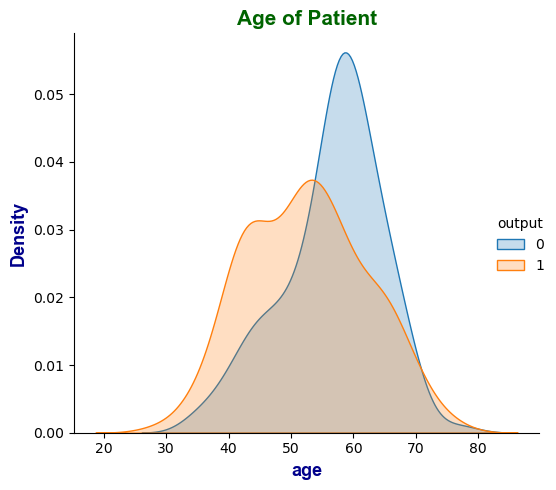

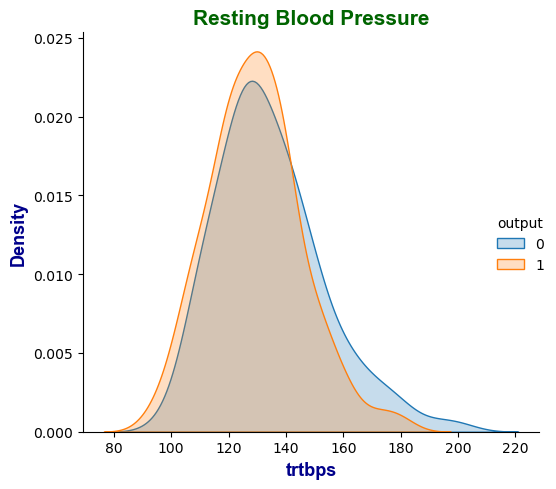

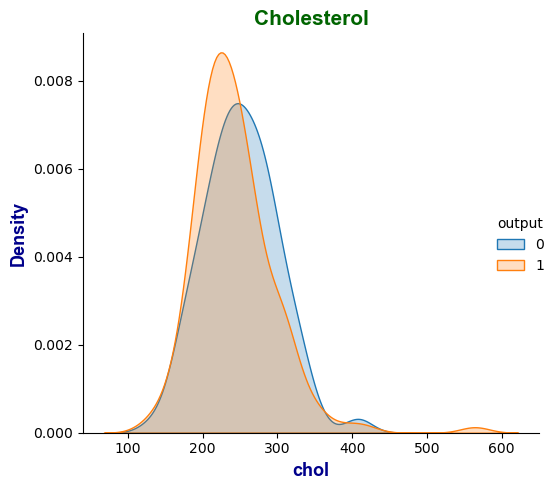

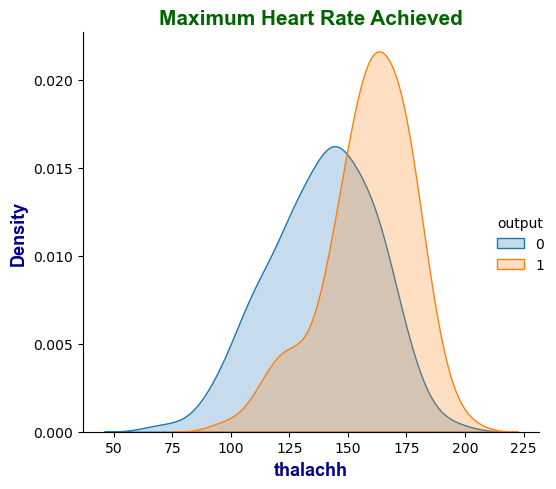

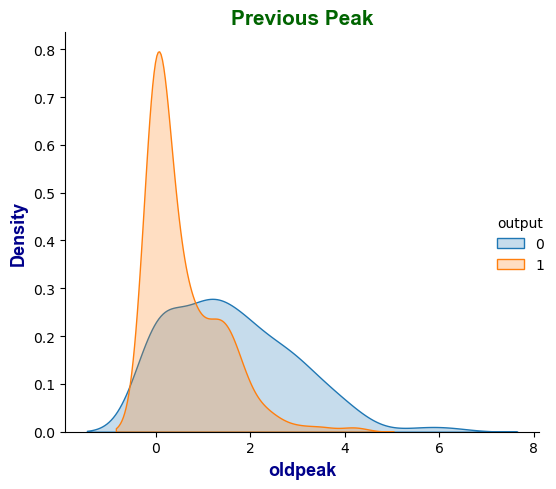

In [18]:
title_font = {'family': 'arial', 'color': 'darkgreen', 'weight': 'bold', 'size': 15}
axis_font = {'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}
NEW_NUMERIC = NUMERIC+['output']

for i, x in zip(NUMERIC, FIG_TILE):
    graph = sns.FacetGrid(df[NEW_NUMERIC], hue='output', height=5)
    graph.map(sns.kdeplot, i, fill = True)
    graph.add_legend()
    plt.title(x, **title_font)
    plt.xlabel(i, **axis_font)
    plt.ylabel("Density", **axis_font)

    plt.tight_layout()
    plt.show()

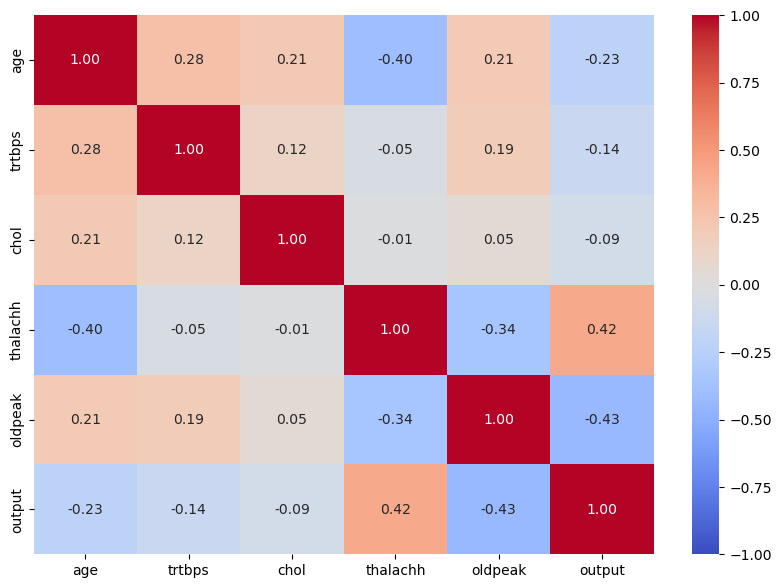

In [21]:
corr = df[NEW_NUMERIC].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f',cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

### 3.2 Categorical x Target variable <a id='3_2'>

In [20]:
#temporarily mapping output as string so it works in sns.countplot
df_plot = df[CATEGORICAL].copy()
mapper = {0: 'Less chance', 1: 'Greater chance'}
df_plot.loc[:,'output'] =  df_plot['output'].map(mapper)

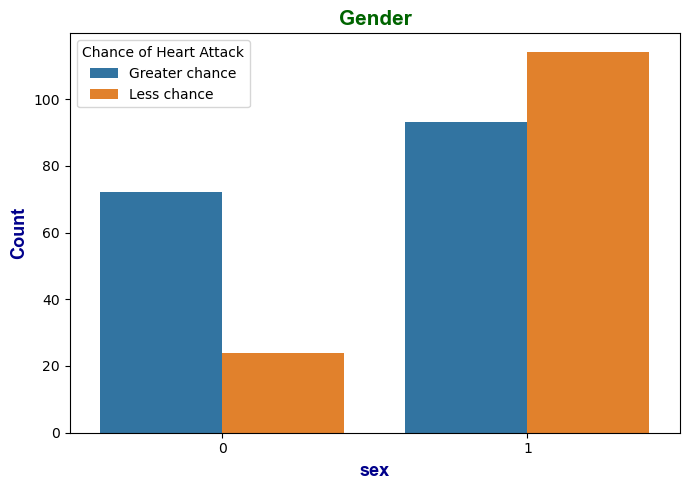

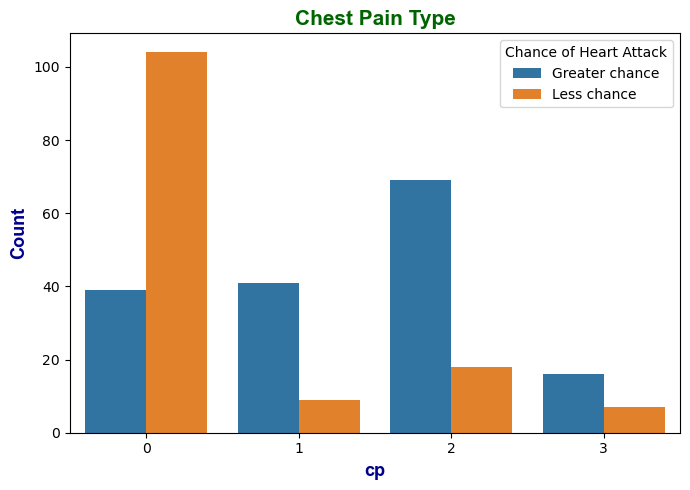

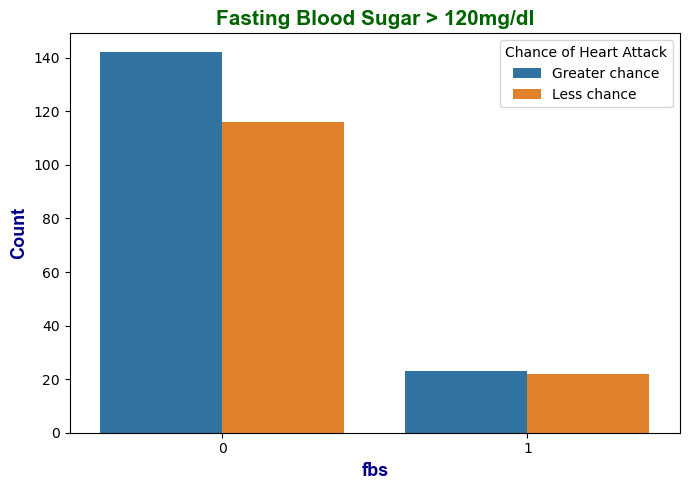

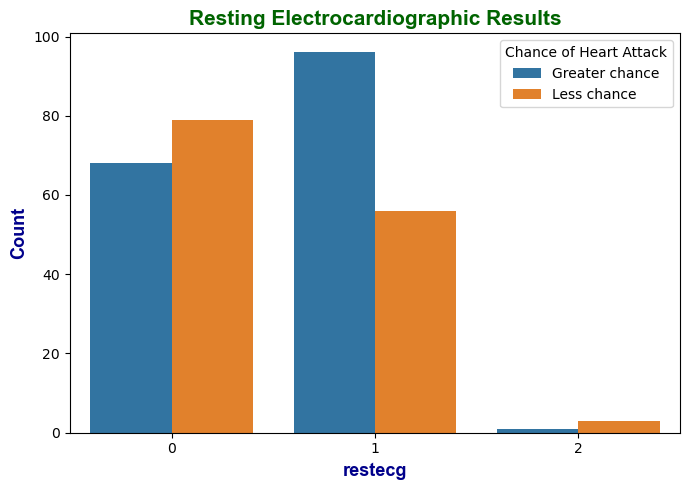

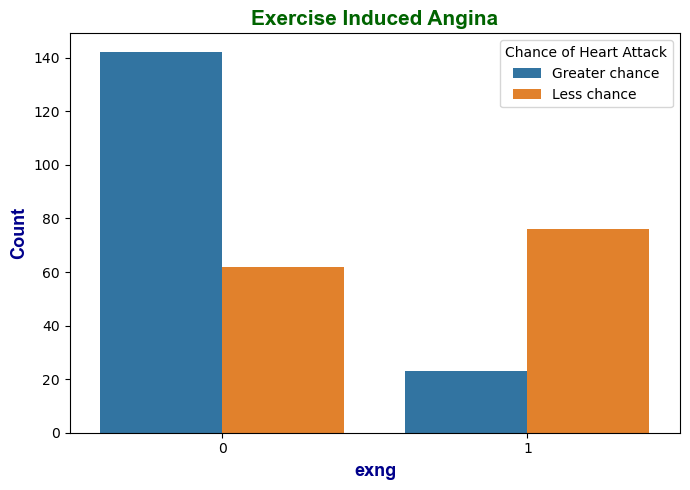

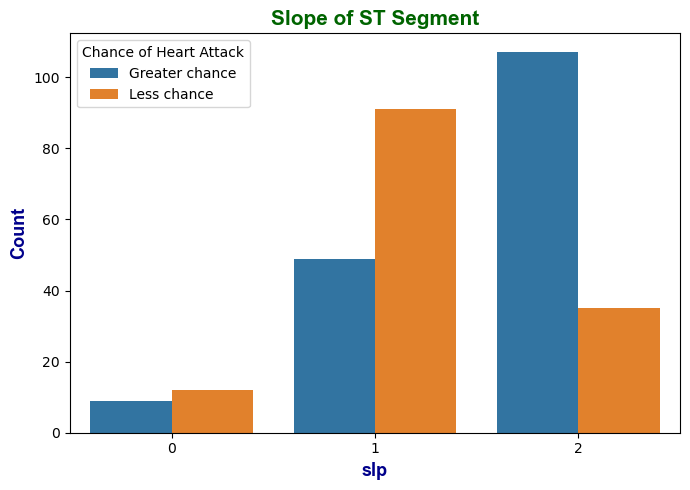

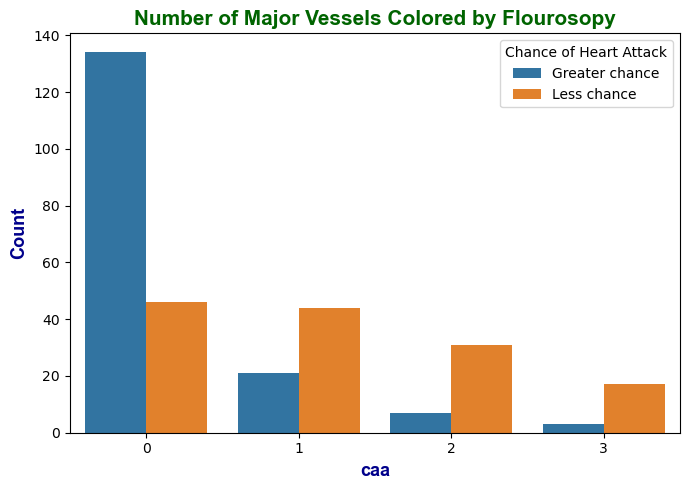

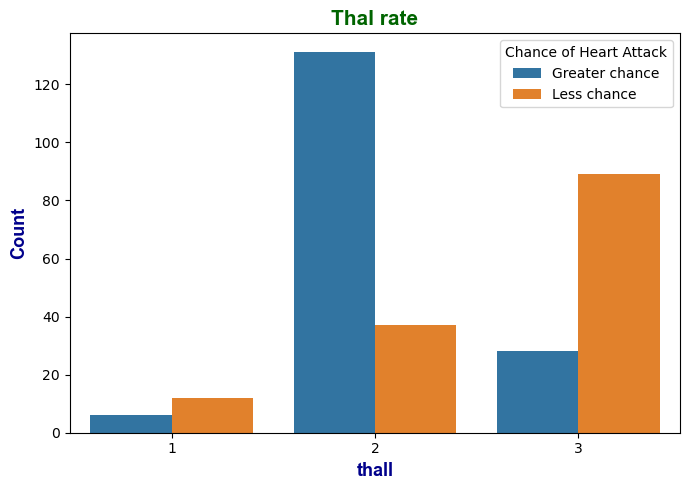

In [21]:
title_font = {'family': 'arial', 'color': 'darkgreen', 'weight': 'bold', 'size': 15}
axis_font = {'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}


for i, x in zip(CATEGORICAL,CATEGORICAL_NAMES):
    if i != 'output':
        plt.figure(figsize=(7,5))
        sns.countplot(data=df_plot, x=i, hue='output')

        plt.legend(title='Chance of Heart Attack')
        plt.title(x, **title_font)
        plt.xlabel(i, **axis_font)
        plt.ylabel("Count", **axis_font)

        plt.tight_layout()
        plt.show()

## 4. Numeric Variables Among Themselves <a id='4'>

In [22]:
df[NUMERIC].head()

age  trtbps  chol  thalachh  oldpeak
0   63     145   233       150      2.3
1   37     130   250       187      3.5
2   41     130   204       172      1.4
3   56     120   236       178      0.8
4   57     120   354       163      0.6

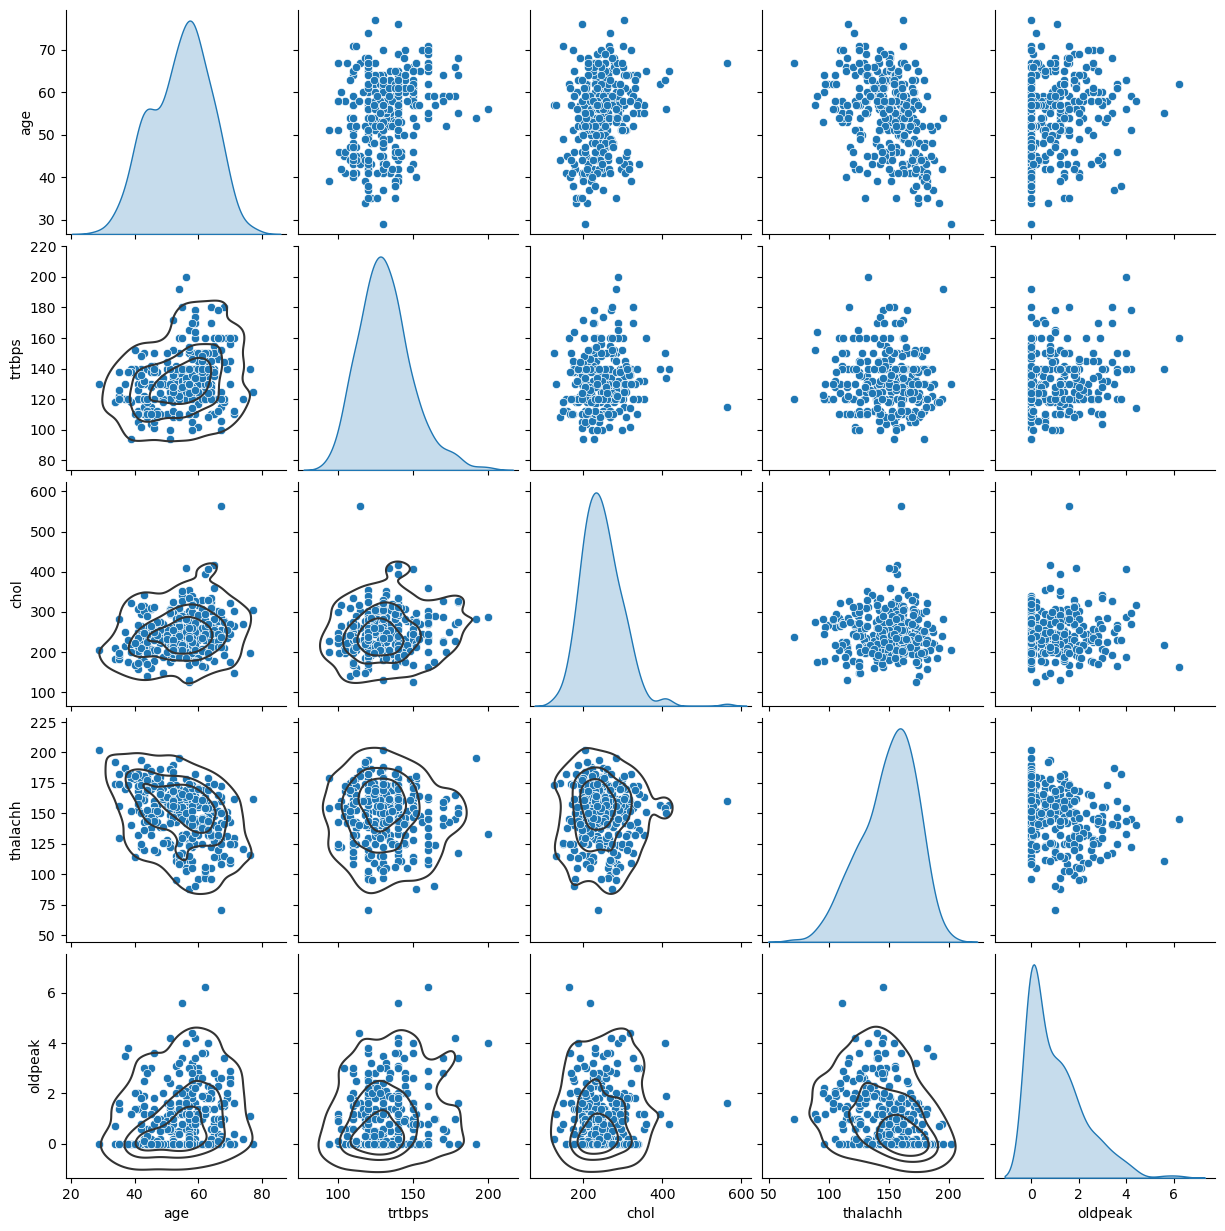

In [23]:
graph = sns.pairplot(df[NUMERIC], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=4, color='.2')
plt.show()

- age and thalack indicate a strong negative correlated relationship

## 5. Stripplots Numeric x Categorical <a id='5'>

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
scaler = RobustScaler()

In [26]:
scaled_values = scaler.fit_transform(df[NUMERIC])

In [27]:
import pickle

In [46]:
#save the scaler so we can use again later to predict new data
with open('robust_scale.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [28]:
scaled_values

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [29]:
df_scaled = pd.DataFrame(scaled_values, columns=NUMERIC)

In [30]:
df_scaled.head()

age  trtbps      chol  thalachh  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

In [31]:
df_new = pd.concat([df_scaled, df['sex']], axis=1)

In [32]:
pd.melt(df_new, id_vars='sex')

sex variable     value
0       1      age  0.592593
1       1      age -1.333333
2       0      age -1.037037
3       1      age  0.074074
4       0      age  0.148148
...   ...      ...       ...
1510    0  oldpeak -0.375000
1511    1  oldpeak  0.250000
1512    1  oldpeak  1.625000
1513    1  oldpeak  0.250000
1514    0  oldpeak -0.500000

[1515 rows x 3 columns]

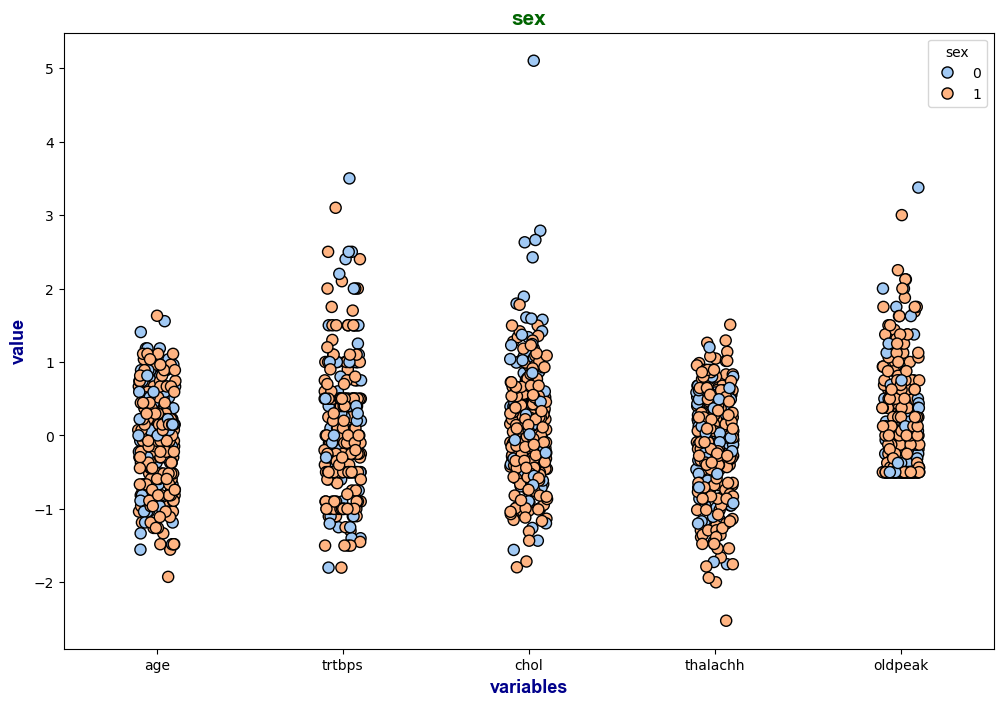

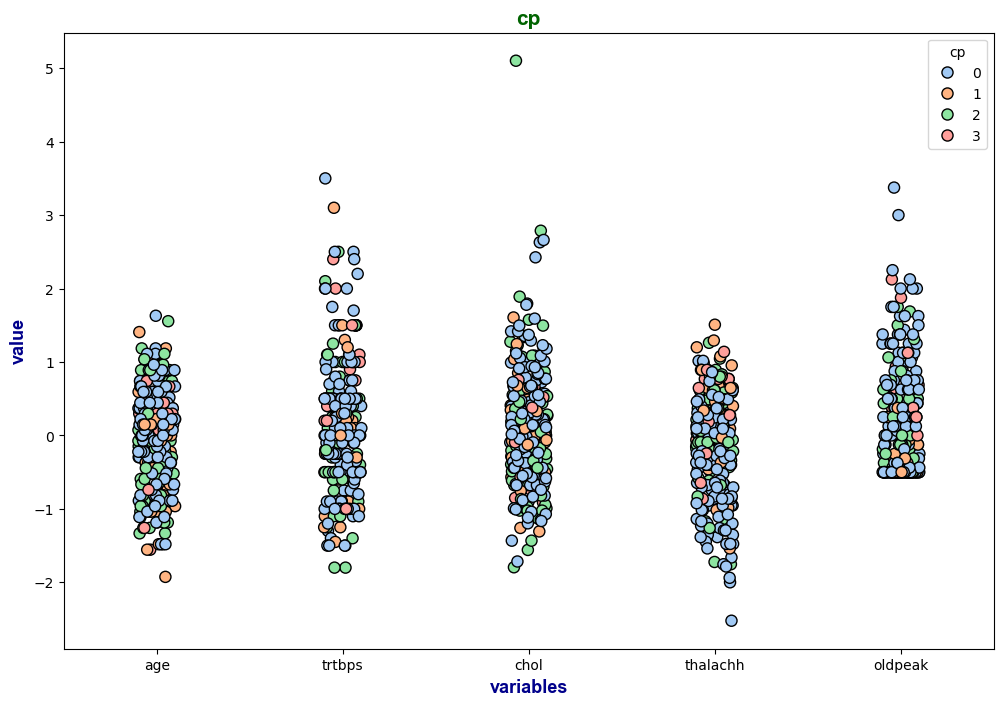

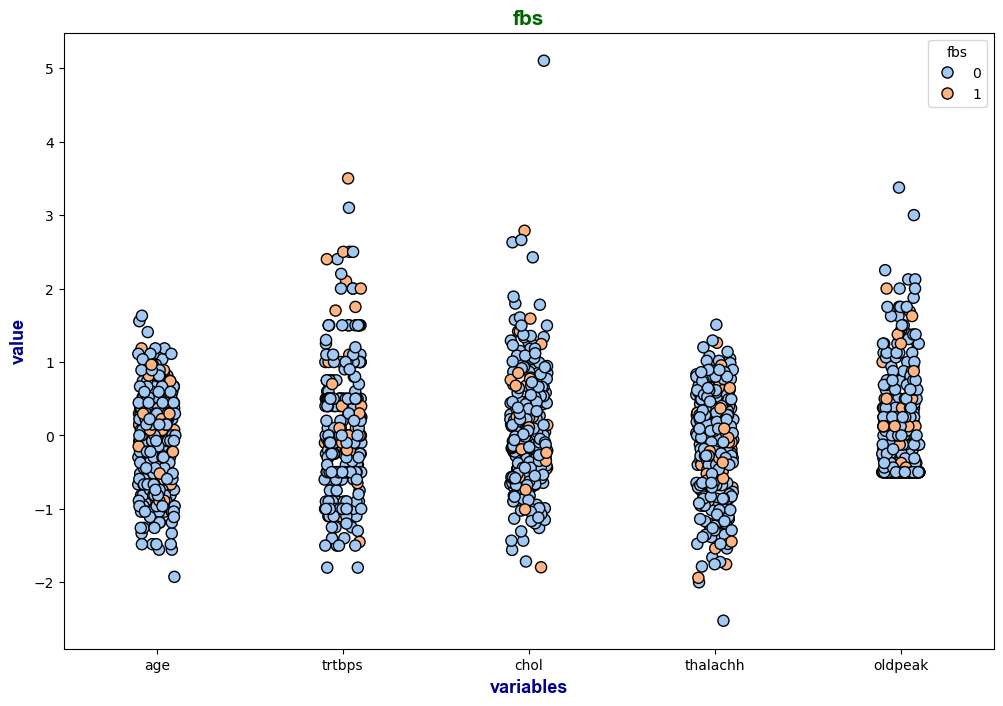

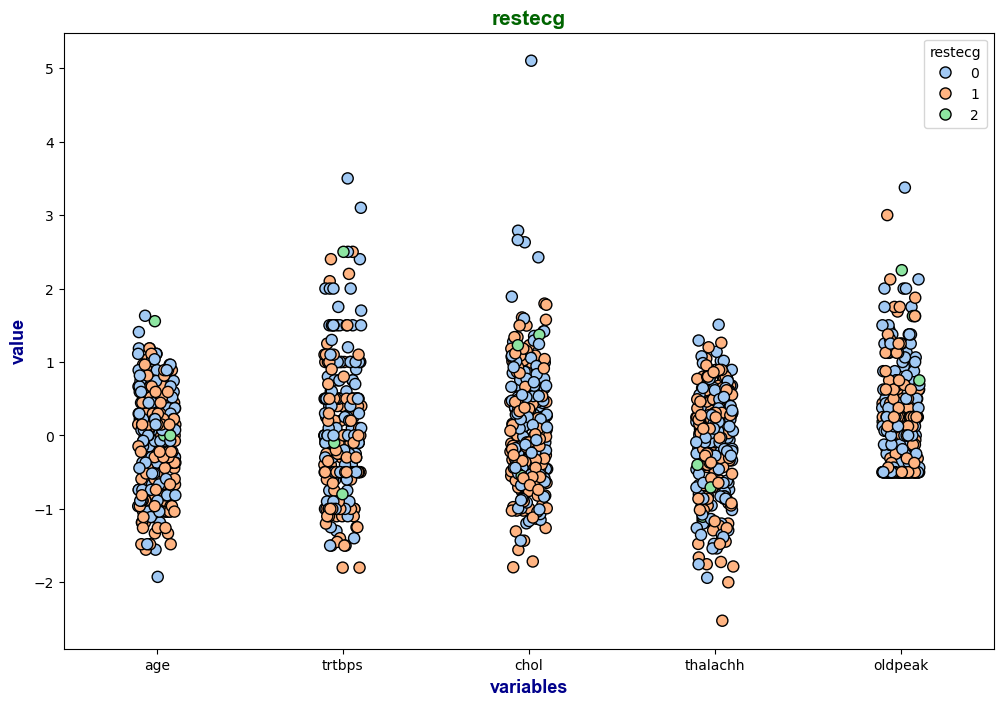

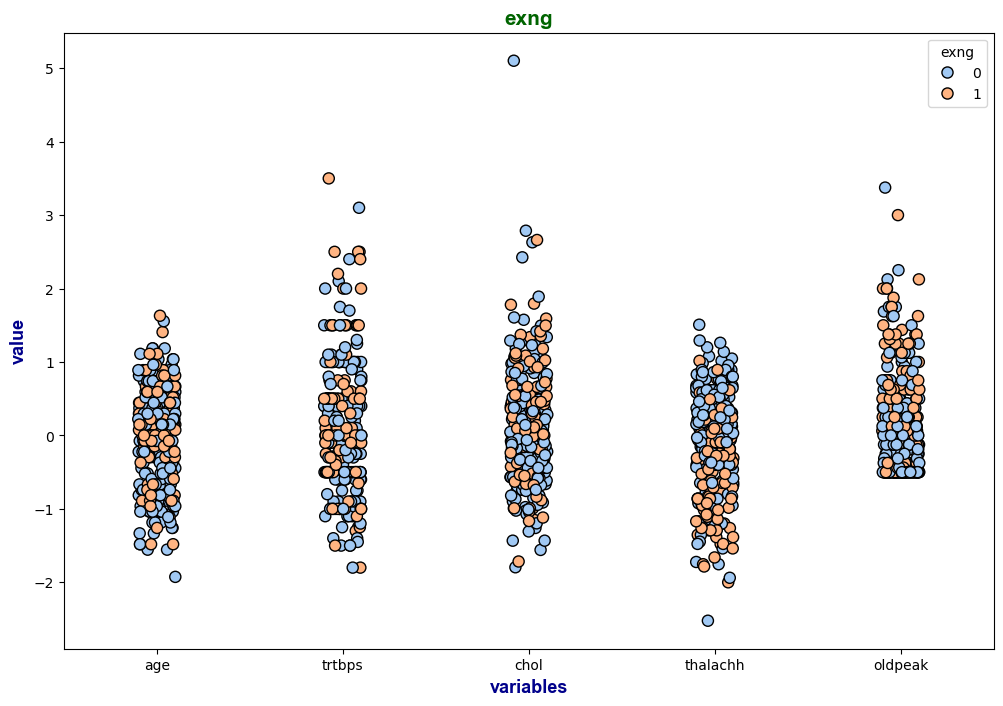

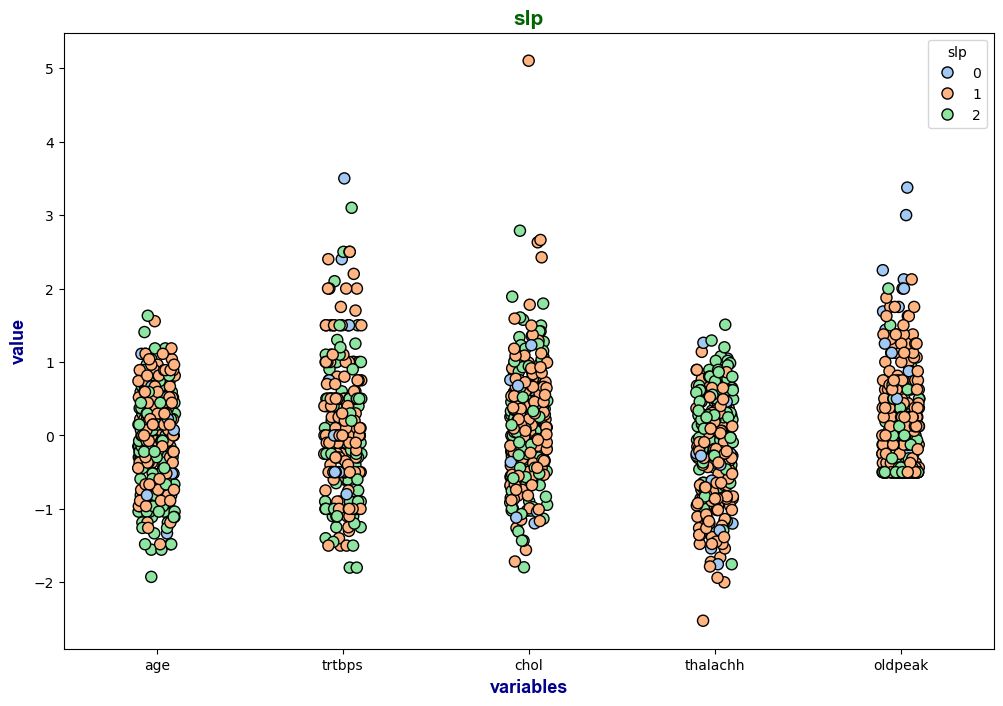

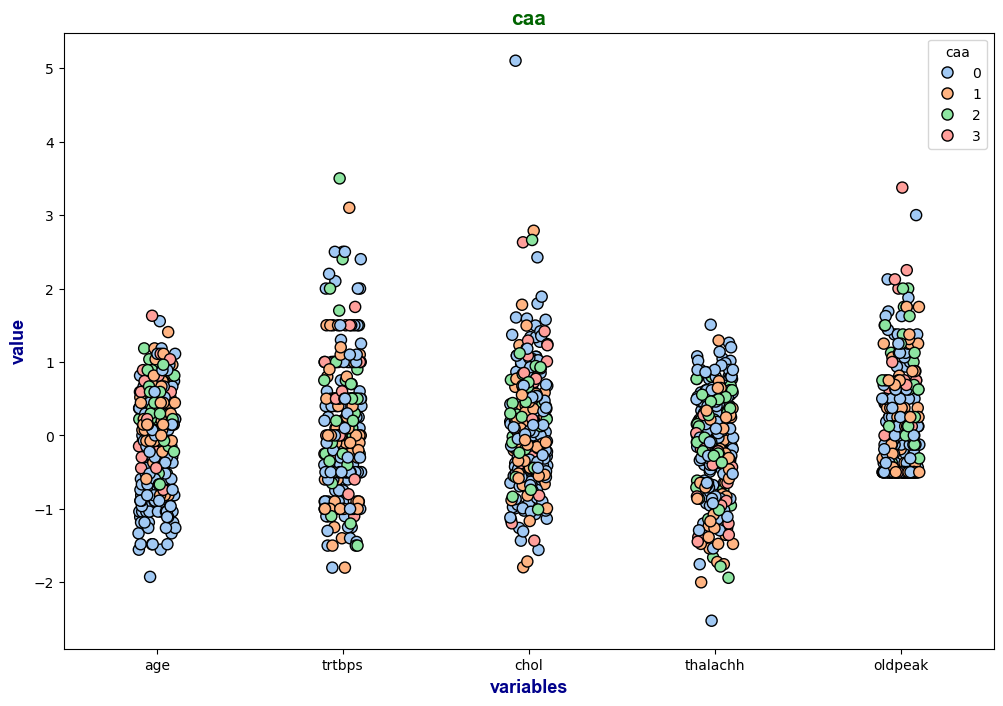

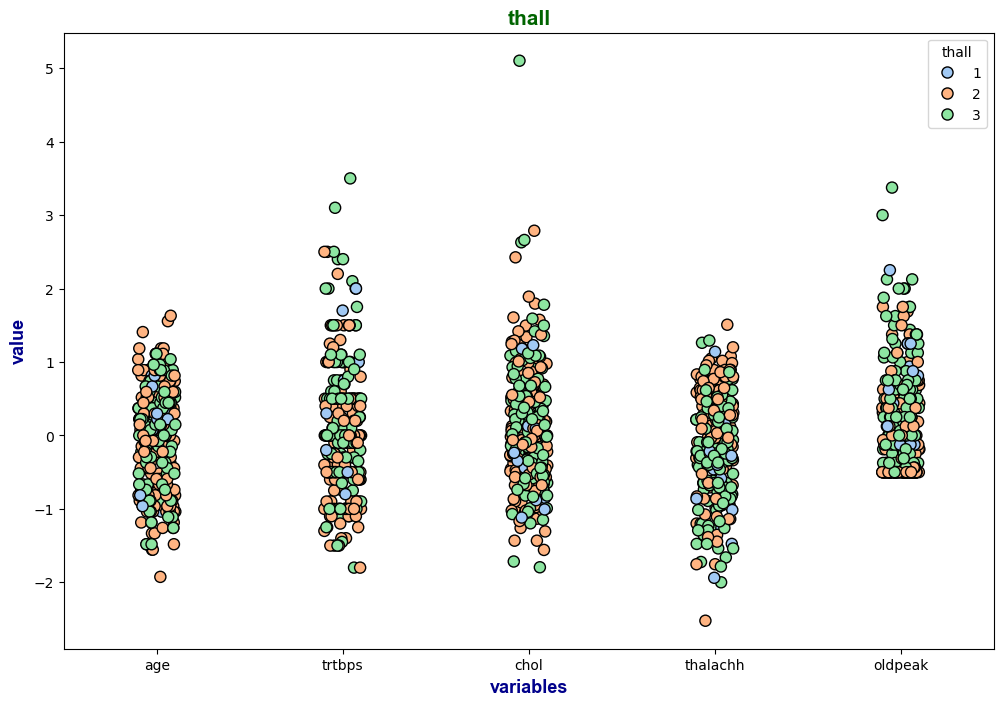

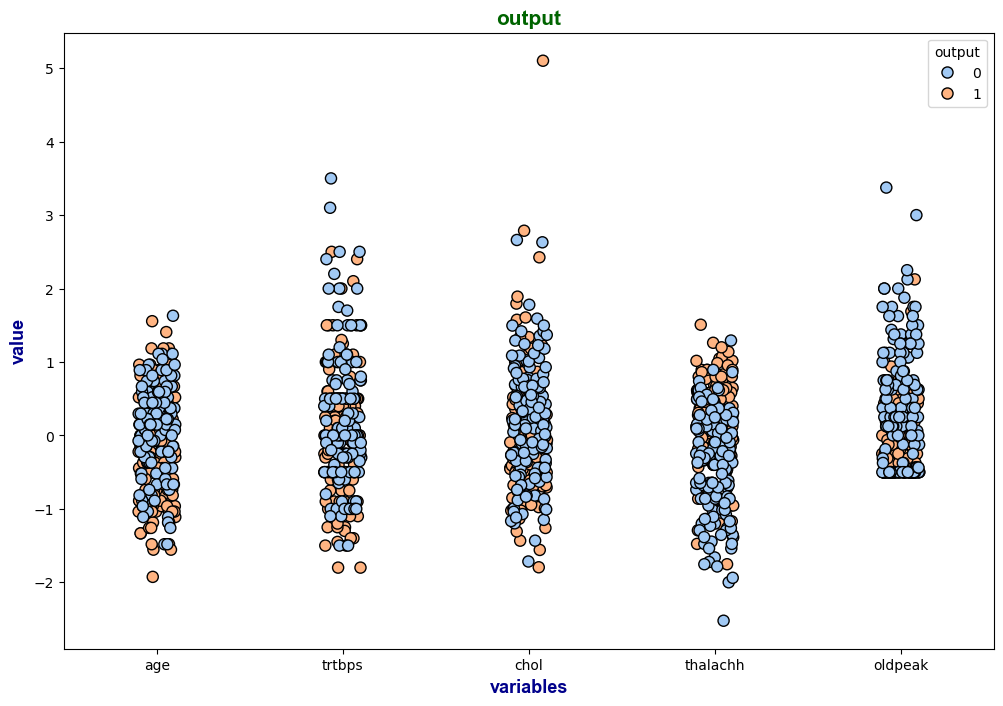

In [33]:
for i in CATEGORICAL:
    df_new = pd.concat([df_scaled, df[i]], axis=1)
    melted_data = pd.melt(df_new, id_vars=i, var_name='variables', value_name='value')
    plt.figure(figsize=(12,8))
    sns.stripplot(data=melted_data, x="variables", y='value', hue=i,s=8, edgecolor='black', linewidth=1.0, palette='pastel')
    
    plt.title(i, **title_font)
    plt.xlabel("variables", **axis_font)
    plt.ylabel("value", **axis_font)

    plt.show()

# 6 Boxplots Numeric x Categorical <a id='6'>

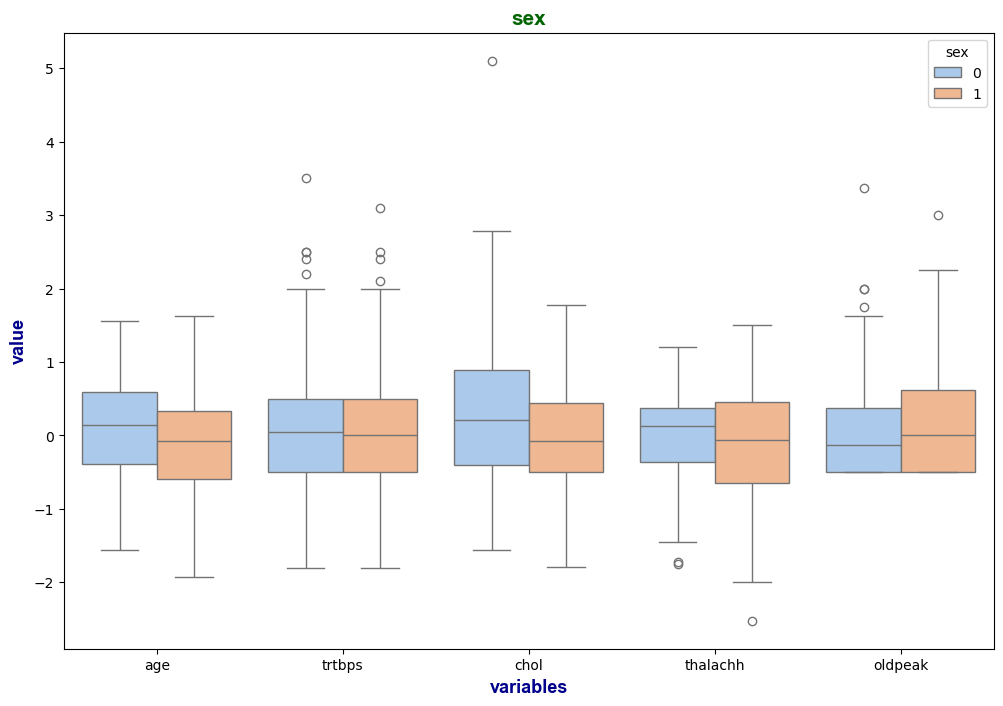

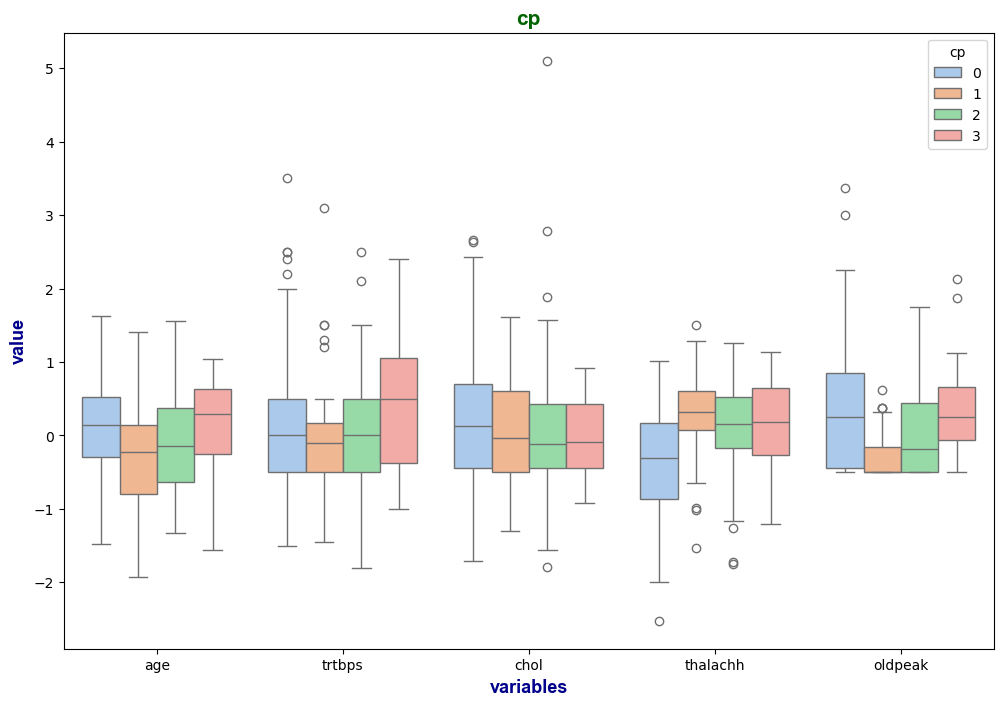

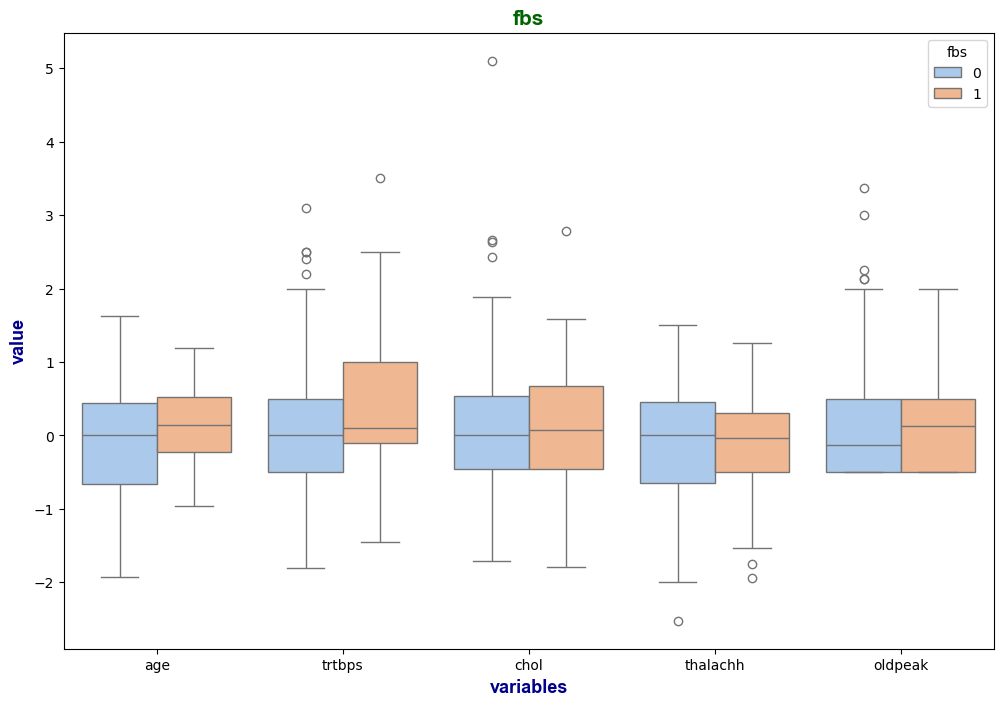

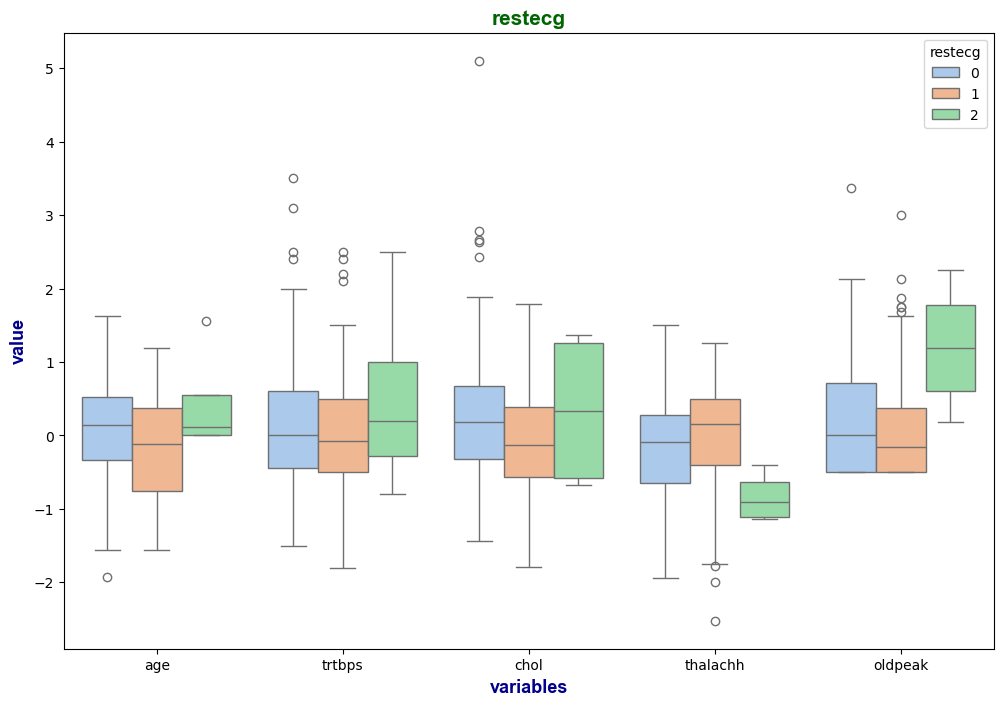

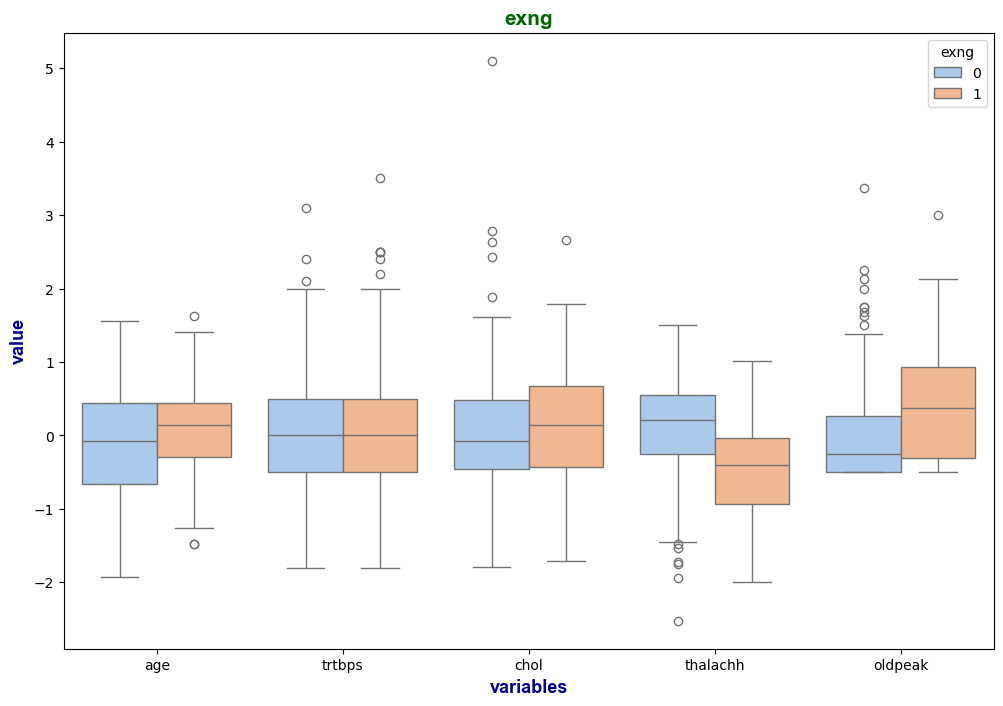

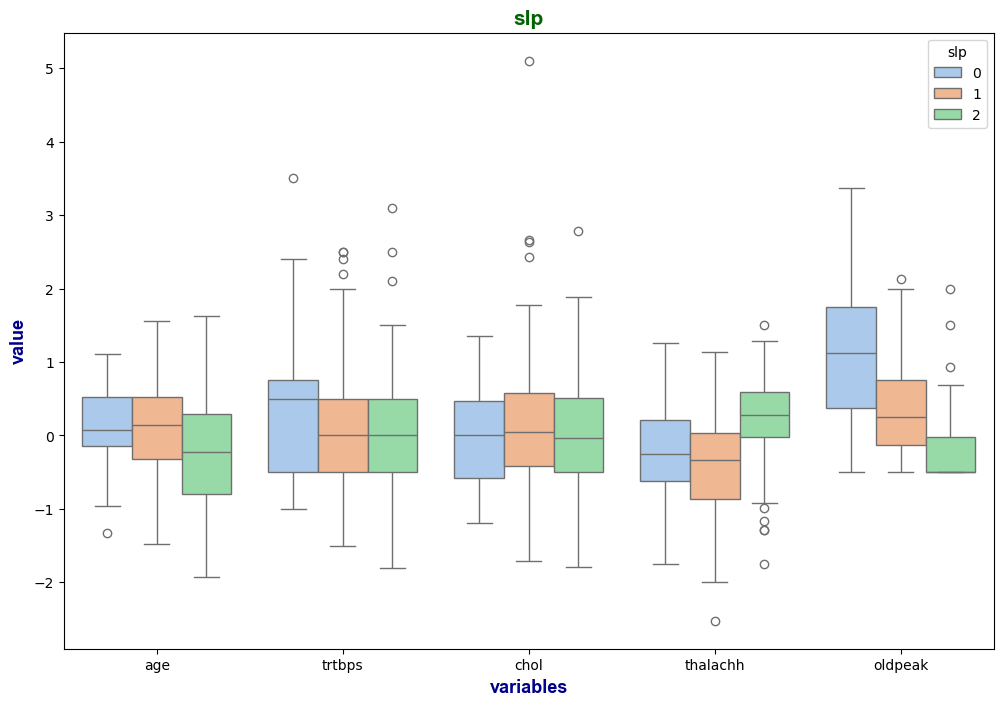

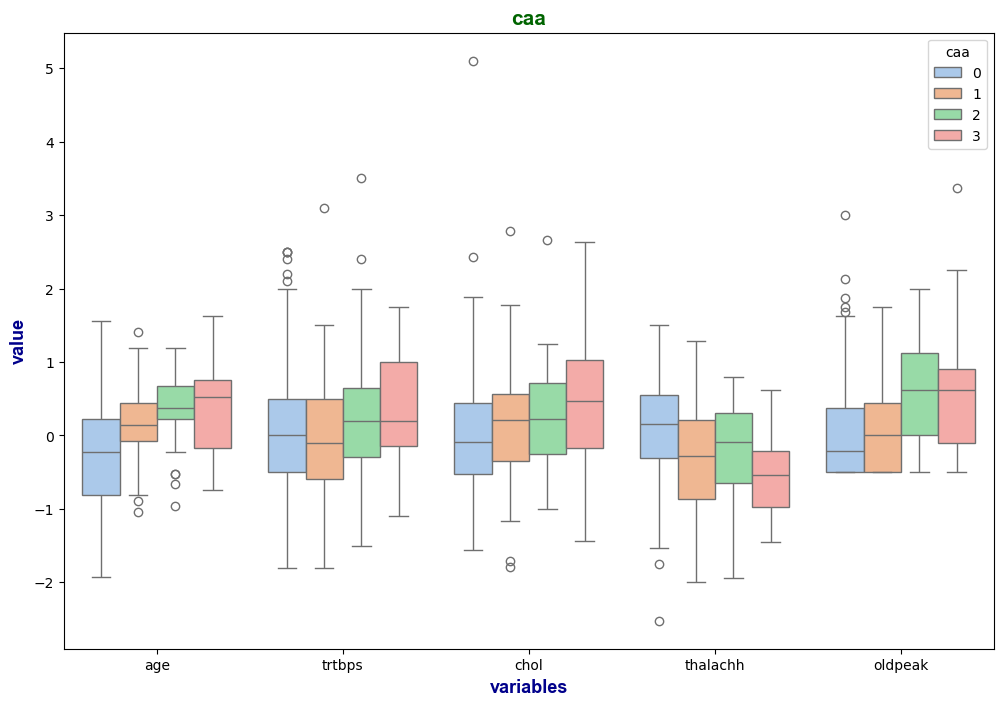

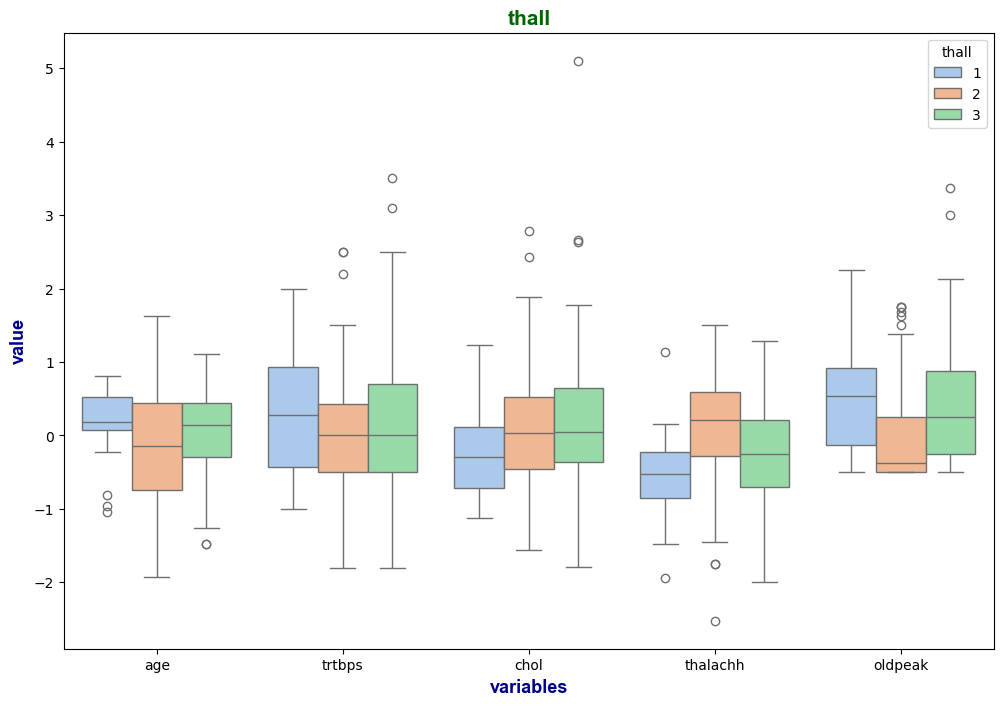

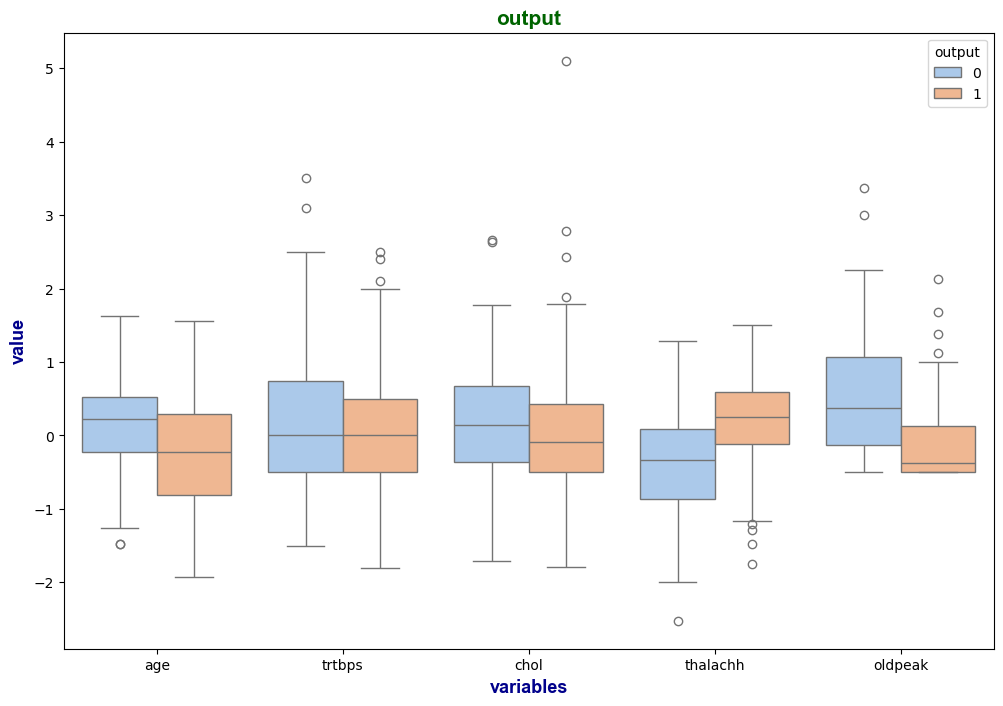

In [34]:
for i in CATEGORICAL:
    df_new = pd.concat([df_scaled, df[i]], axis=1)
    melted_data = pd.melt(df_new, id_vars=i, var_name='variables', value_name='value')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=melted_data, x="variables", y='value', hue=i, palette='pastel')
    
    plt.title(i, **title_font)
    plt.xlabel("variables", **axis_font)
    plt.ylabel("value", **axis_font)

    plt.show()

## 7. Heatmap All Variables<a id='7'>

In [35]:
df_heat = pd.concat([df_scaled,df[CATEGORICAL]], axis=1)

In [36]:
df_heat.head()

age  trtbps      chol  thalachh  oldpeak  sex  cp  fbs  restecg  exng  \
0  0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1        0     0   
1 -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0        1     0   
2 -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0        0     0   
3  0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0        1     0   
4  0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0        1     1   

   slp  caa  thall  output  
0    0    0      1       1  
1    0    0      2       1  
2    2    0      2       1  
3    2    0      2       1  
4    2    0      2       1

In [37]:
df_corr = df_heat.corr()

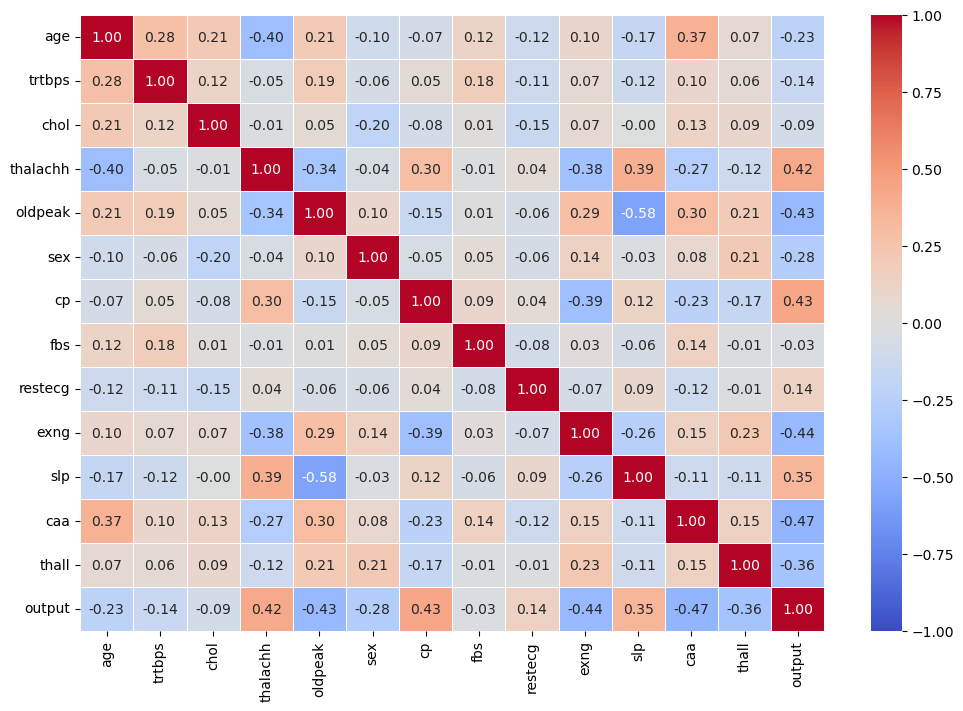

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5)
plt.show()

## 8. Modeling Prep <a id='8'>

In [39]:
REMOVE = ['chol', 'fbs', 'restecg']
df_removed = df.drop(REMOVE, axis=1)
df_removed.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145       150     0      2.3    0    0      1       1
1   37    1   2     130       187     0      3.5    0    0      2       1
2   41    0   1     130       172     0      1.4    2    0      2       1
3   56    1   1     120       178     0      0.8    2    0      2       1
4   57    0   0     120       163     1      0.6    2    0      2       1

### 8.1 Dealing with outliers <a id='8_1'>

In [40]:
from scipy.stats import zscore
from scipy import stats
from scipy.stats.mstats import winsorize

In [41]:
oldPeak_zscores = zscore(df_removed['trtbps'])
for i in range(1,4):
    outliers = np.where(oldPeak_zscores>i,1,0).sum()
    print(f"Threshold {i}: Outliers = {outliers}")
    print('-'*20)

Threshold 1: Outliers = 51
--------------------
Threshold 2: Outliers = 13
--------------------
Threshold 3: Outliers = 2
--------------------


In [42]:
df_removed[oldPeak_zscores>2].trtbps

8      172
101    178
110    180
152    170
195    170
203    180
223    200
228    170
241    174
248    192
260    178
266    180
292    170
Name: trtbps, dtype: int64

In [43]:
df_removed[oldPeak_zscores>2].trtbps.min()

170

In [44]:
df_removed[df_removed['trtbps'] < 170].trtbps.max()

165

In [45]:
winsorize_percentile_trtbps = (stats.percentileofscore(df['trtbps'], 165))/100
print(winsorize_percentile_trtbps)

0.957095709570957


In [46]:
1-winsorize_percentile_trtbps

0.04290429042904298

In [47]:
trtbps_winsorize = winsorize(df.trtbps, (0, 1-winsorize_percentile_trtbps))

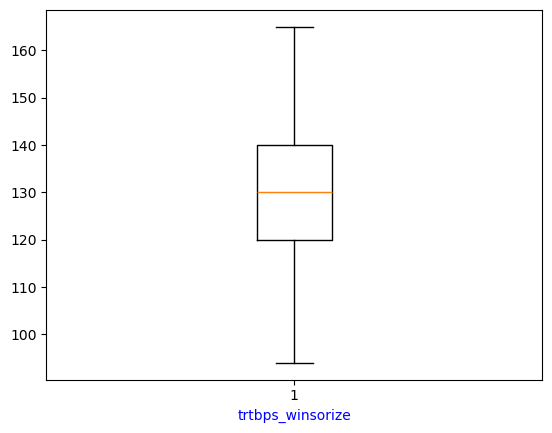

In [48]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color='b')
plt.show()

In [49]:
df_removed['trtbps_winsorize'] = trtbps_winsorize

In [50]:
df_removed.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
0   63    1   3     145       150     0      2.3    0    0      1       1   
1   37    1   2     130       187     0      3.5    0    0      2       1   
2   41    0   1     130       172     0      1.4    2    0      2       1   
3   56    1   1     120       178     0      0.8    2    0      2       1   
4   57    0   0     120       163     1      0.6    2    0      2       1   

   trtbps_winsorize  
0               145  
1               130  
2               130  
3               120  
4               120

In [51]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    iqr = q3 - q1
    lower_v = q1 - (1.5*iqr)
    upper_v = q3 + (1.5*iqr)
    print("Lower_bound", lower_v)
    print("upper_bound", upper_v)
    return df_removed[(df_removed[var] < lower_v) | (df_removed[var] > upper_v)]

In [52]:
df_removed.columns

Index(['age', 'sex', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall', 'output', 'trtbps_winsorize'],
      dtype='object')

In [53]:
iqr(df_removed, 'thalachh')

Lower_bound 84.75
upper_bound 214.75


age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
272   67    1   0     120        71     0      1.0    1    0      2       0   

     trtbps_winsorize  
272               120

In [54]:
df_removed = df_removed.drop([272], axis=0)

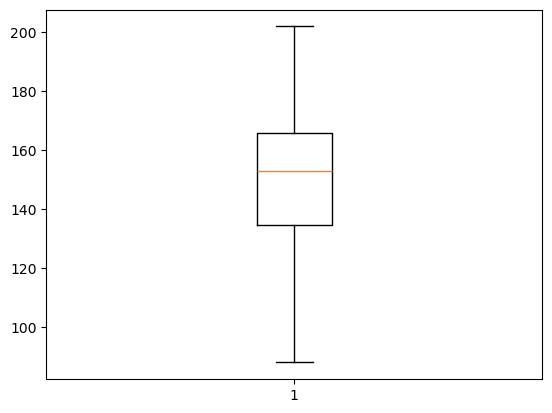

In [55]:
plt.boxplot(df_removed['thalachh'])
plt.show()

In [56]:
iqr(df_removed, 'oldpeak')

Lower_bound -2.4000000000000004
upper_bound 4.0


age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
101   59    1   3     178       145     0      4.2    0    0      3       1   
204   62    0   0     160       145     0      6.2    0    3      3       0   
221   55    1   0     140       111     1      5.6    0    0      3       0   
250   51    1   0     140       122     1      4.2    1    3      3       0   
291   58    1   0     114       140     0      4.4    0    3      1       0   

     trtbps_winsorize  
101               165  
204               160  
221               140  
250               140  
291               114

In [57]:
df_removed[df_removed['oldpeak'] < 4.2].oldpeak.max()

4.0

In [58]:
oldpeak_winsorize_pct = stats.percentileofscore(df_removed['oldpeak'], 4.0) / 100

In [59]:
oldpeak_winsorize_pct

0.980132450331126

In [60]:
1-oldpeak_winsorize_pct

0.01986754966887405

In [61]:
oldpeak_winsorized = winsorize(df_removed.oldpeak, (0, 1-oldpeak_winsorize_pct))

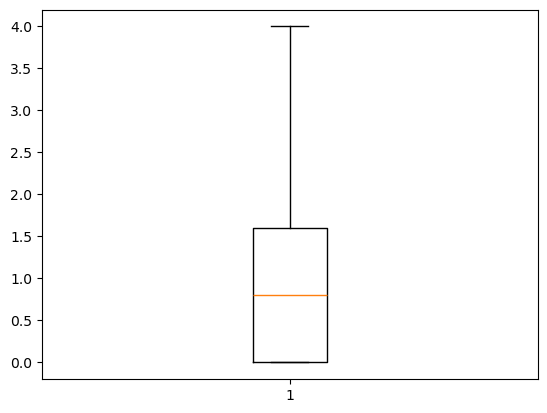

In [62]:
plt.boxplot(oldpeak_winsorized)
plt.show()

In [63]:
df_removed['oldpeak_winsorized'] = oldpeak_winsorized

In [64]:
df_removed.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
0   63    1   3     145       150     0      2.3    0    0      1       1   
1   37    1   2     130       187     0      3.5    0    0      2       1   
2   41    0   1     130       172     0      1.4    2    0      2       1   
3   56    1   1     120       178     0      0.8    2    0      2       1   
4   57    0   0     120       163     1      0.6    2    0      2       1   

   trtbps_winsorize  oldpeak_winsorized  
0               145                 2.3  
1               130                 3.5  
2               130                 1.4  
3               120                 0.8  
4               120                 0.6

In [65]:
df_removed = df_removed.drop(['trtbps', 'oldpeak'], axis=1)

### 8.2 Distributions of Numeric variables<a id='8_2'>

In [66]:
df_removed.head()

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0   63    1   3       150     0    0    0      1       1               145   
1   37    1   2       187     0    0    0      2       1               130   
2   41    0   1       172     0    2    0      2       1               130   
3   56    1   1       178     0    2    0      2       1               120   
4   57    0   0       163     1    2    0      2       1               120   

   oldpeak_winsorized  
0                 2.3  
1                 3.5  
2                 1.4  
3                 0.8  
4                 0.6

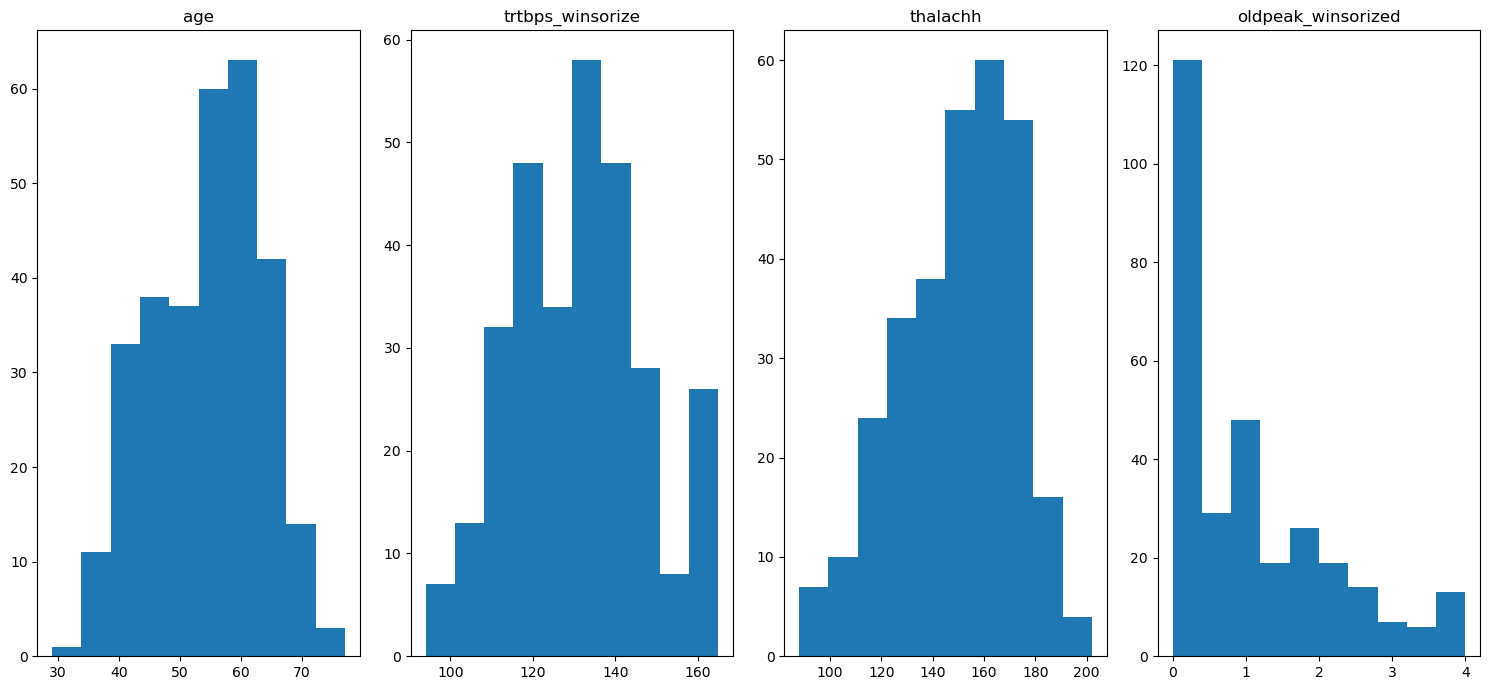

In [67]:
fig, axes = plt.subplots(1,4, figsize=(15,7))
COLS = ['age', 'trtbps_winsorize', 'thalachh', 'oldpeak_winsorized']
for i, ax in enumerate(axes.flatten()):
    column = COLS[i]
    ax.hist(df_removed[column])
    ax.set_title(column)
plt.tight_layout()
plt.show()


In [68]:
df_removed[COLS].agg(['skew']).transpose()

skew
age                -0.199209
trtbps_winsorize    0.251969
thalachh           -0.461611
oldpeak_winsorized  0.996036

- As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [69]:
df_removed['oldpeak_winsorize_log'] = np.log(df_removed['oldpeak_winsorized'])
df_removed['oldpeak_winsorize_sqrt'] = np.sqrt(df_removed['oldpeak_winsorized'])

c:\Users\silva\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
df_removed[['oldpeak_winsorized', 'oldpeak_winsorize_log', 'oldpeak_winsorize_sqrt']].agg(['skew']).transpose()

c:\Users\silva\anaconda3\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


skew
oldpeak_winsorized      0.996036
oldpeak_winsorize_log        NaN
oldpeak_winsorize_sqrt  0.108926

In [71]:
df_removed = df_removed.drop(['oldpeak_winsorized', 'oldpeak_winsorize_log'], axis=1)

In [72]:
df_removed.head()

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0   63    1   3       150     0    0    0      1       1               145   
1   37    1   2       187     0    0    0      2       1               130   
2   41    0   1       172     0    2    0      2       1               130   
3   56    1   1       178     0    2    0      2       1               120   
4   57    0   0       163     1    2    0      2       1               120   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

## 9. One-Hot Encoding<a id='9'>

In [73]:
CATEGORICAL

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [74]:
df_removed

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0     63    1   3       150     0    0    0      1       1               145   
1     37    1   2       187     0    0    0      2       1               130   
2     41    0   1       172     0    2    0      2       1               130   
3     56    1   1       178     0    2    0      2       1               120   
4     57    0   0       163     1    2    0      2       1               120   
..   ...  ...  ..       ...   ...  ...  ...    ...     ...               ...   
298   57    0   0       123     1    1    0      3       0               140   
299   45    1   3       132     0    1    0      3       0               110   
300   68    1   0       141     0    1    2      3       0               144   
301   57    1   0       115     1    1    1      3       0               130   
302   57    0   1       174     0    1    1      2       0               130   

     oldpeak_winsorize_sqrt  
0                  1.516575  
1                  1.870829  
2                  1.183216  
3                  0.894427  
4                  0.774597  
..                      ...  
298                0.447214  
299                1.095445  
300                1.843909  
301                1.095445  
302                0.000000  

[302 rows x 11 columns]

In [75]:
CATEGORICAL_REM = [x for x in CATEGORICAL if x not in REMOVE]

In [76]:
CATEGORICAL_REM.remove('output')

In [77]:
for c in CATEGORICAL_REM:
    print(f"{c} uniques = {df_removed[c].unique().shape[0]}")

sex uniques = 2
cp uniques = 4
exng uniques = 2
slp uniques = 3
caa uniques = 4
thall uniques = 3


In [78]:
CATEGORICAL_REM = pd.Index(CATEGORICAL_REM)

In [79]:
CATEGORICAL_REM = CATEGORICAL_REM.drop(['sex', 'exng'])

In [80]:
df_dummy = pd.get_dummies(df_removed, columns=CATEGORICAL_REM, drop_first=True)

In [81]:
df_dummy.head()

age  sex  thalachh  exng  output  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0   63    1       150     0       1               145                1.516575   
1   37    1       187     0       1               130                1.870829   
2   41    0       172     0       1               130                1.183216   
3   56    1       178     0       1               120                0.894427   
4   57    0       163     1       1               120                0.774597   

    cp_1   cp_2   cp_3  slp_1  slp_2  caa_1  caa_2  caa_3  thall_2  thall_3  
0  False  False   True  False  False  False  False  False    False    False  
1  False   True  False  False  False  False  False  False     True    False  
2   True  False  False  False   True  False  False  False     True    False  
3   True  False  False  False   True  False  False  False     True    False  
4  False  False  False  False   True  False  False  False     True    False

## 10. Feature scaling <a id='10'>

In [82]:
scaler = RobustScaler()

In [83]:
df_dummy.columns

Index(['age', 'sex', 'thalachh', 'exng', 'output', 'trtbps_winsorize',
       'oldpeak_winsorize_sqrt', 'cp_1', 'cp_2', 'cp_3', 'slp_1', 'slp_2',
       'caa_1', 'caa_2', 'caa_3', 'thall_2', 'thall_3'],
      dtype='object')

In [84]:
NUMERIC2 = ['age', 'thalachh', 'trtbps_winsorize', 'oldpeak_winsorize_sqrt']

In [85]:
df_dummy.loc[:, NUMERIC2] = scaler.fit_transform(df_dummy.loc[:, NUMERIC2])

In [86]:
for c in df_dummy:
    df_dummy[c] = df_dummy[c].astype('float32')

In [87]:
df_dummy.head()

age  sex  thalachh  exng  output  trtbps_winsorize  \
0  0.581818  1.0 -0.095238   0.0     1.0              0.75   
1 -1.309091  1.0  1.079365   0.0     1.0              0.00   
2 -1.018182  0.0  0.603175   0.0     1.0              0.00   
3  0.072727  1.0  0.793651   0.0     1.0             -0.50   
4  0.145455  0.0  0.317460   1.0     1.0             -0.50   

   oldpeak_winsorize_sqrt  cp_1  cp_2  cp_3  slp_1  slp_2  caa_1  caa_2  \
0                0.491851   0.0   0.0   1.0    0.0    0.0    0.0    0.0   
1                0.771913   0.0   1.0   0.0    0.0    0.0    0.0    0.0   
2                0.228308   1.0   0.0   0.0    0.0    1.0    0.0    0.0   
3                0.000000   1.0   0.0   0.0    0.0    1.0    0.0    0.0   
4               -0.094734   0.0   0.0   0.0    0.0    1.0    0.0    0.0   

   caa_3  thall_2  thall_3  
0    0.0      0.0      0.0  
1    0.0      1.0      0.0  
2    0.0      1.0      0.0  
3    0.0      1.0      0.0  
4    0.0      1.0      0.0

In [88]:
df_dummy.to_csv('df_removed_encoded.csv', index=None)

In [8]:
df_dummy = pd.read_csv('df_removed_encoded.csv')

## 11. Model training (variables removed) <a id='11'>

In [9]:
x = df_dummy.drop('output',axis=1)
y = df_dummy['output']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=30)

In [92]:
df_dummy.head()

age  sex  thalachh  exng  output  trtbps_winsorize  \
0  0.581818  1.0 -0.095238   0.0     1.0              0.75   
1 -1.309091  1.0  1.079365   0.0     1.0              0.00   
2 -1.018182  0.0  0.603175   0.0     1.0              0.00   
3  0.072727  1.0  0.793651   0.0     1.0             -0.50   
4  0.145455  0.0  0.317460   1.0     1.0             -0.50   

   oldpeak_winsorize_sqrt  cp_1  cp_2  cp_3  slp_1  slp_2  caa_1  caa_2  \
0                0.491851   0.0   0.0   1.0    0.0    0.0    0.0    0.0   
1                0.771913   0.0   1.0   0.0    0.0    0.0    0.0    0.0   
2                0.228308   1.0   0.0   0.0    0.0    1.0    0.0    0.0   
3                0.000000   1.0   0.0   0.0    0.0    1.0    0.0    0.0   
4               -0.094734   0.0   0.0   0.0    0.0    1.0    0.0    0.0   

   caa_3  thall_2  thall_3  
0    0.0      0.0      0.0  
1    0.0      1.0      0.0  
2    0.0      1.0      0.0  
3    0.0      1.0      0.0  
4    0.0      1.0      0.0

In [93]:
train_x.shape

(211, 16)

In [94]:
test_x.shape

(91, 16)

### 11.1 Logistic Regression <a id='11_1'>

In [195]:
log_reg = LogisticRegression()

In [196]:
log_reg.fit(train_x, train_y)

LogisticRegression()

In [245]:
def full_classification_report(model, train_set: tuple, test_set: tuple, neural_net=False, threshold=0.5) -> None:
    """
    Generate classificaiton reports for train and test sets to compare bias/variance.
    """
    try:
        if not neural_net:
            train_pred = model.predict_proba(train_set[0])[:,1]
        else:
            train_pred = model.predict(train_set[0])
        train_pred = np.where(train_pred>threshold,1,0)
        print("TRAINING")
        print(classification_report(train_pred,train_set[1]))
        print('-'*100)
        print('TESTING')
        if not neural_net:
            test_pred = model.predict_proba(test_set[0])[:,1]
        else:
            test_pred = model.predict(test_set[0])
        test_pred = np.where(test_pred>threshold, 1, 0)
        print(classification_report(test_pred,test_set[1]))
    except Exception as e:
        print(e)
        print("Make sure to pass train and set sets as tuples of form (x,y)")

In [197]:
train_set = (train_x,train_y)
test_set = (test_x,test_y)

In [198]:
full_classification_report(log_reg, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        89
         1.0       0.92      0.86      0.89       122

    accuracy                           0.88       211
   macro avg       0.87      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        39
         1.0       0.86      0.85      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [130]:
scores = cross_val_score(log_reg, test_x, test_y, cv=10)

In [131]:
pd.DataFrame(scores, columns=['Fold']).mean()

Fold    0.801111
dtype: float64

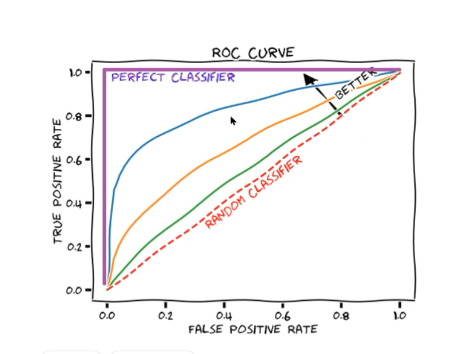
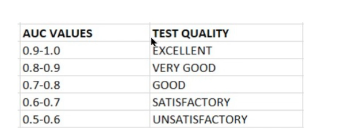

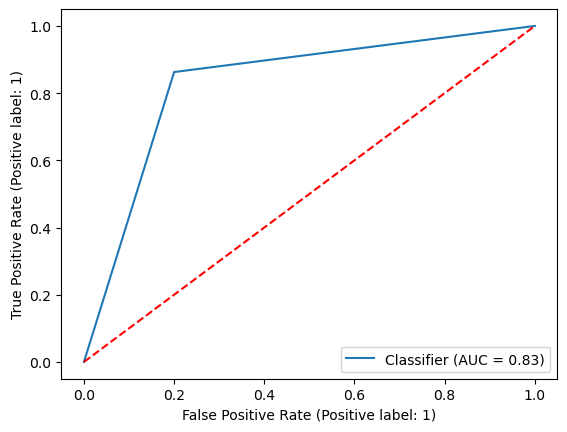

In [133]:
RocCurveDisplay.from_predictions(test_y, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

In [199]:
new_log = LogisticRegression()

In [200]:
params={
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
    
}

In [201]:
log_reg_grid = GridSearchCV(new_log, param_grid=params)

In [202]:
log_reg_grid.fit(train_x,train_y)

c:\Users\silva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\silva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\silva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\silva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(s

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [203]:
log_reg_grid.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [204]:
log2 = LogisticRegression(penalty='l2', solver='lbfgs')

In [205]:
log2.fit(train_x,train_y)

LogisticRegression()

In [206]:
full_classification_report(log2, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        89
         1.0       0.92      0.86      0.89       122

    accuracy                           0.88       211
   macro avg       0.87      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        39
         1.0       0.86      0.85      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### 11.2 Decision Trees <a id='11_2'>

In [207]:
cftree = DecisionTreeClassifier()

In [208]:
cftree.fit(train_x,train_y)

DecisionTreeClassifier()

In [209]:
full_classification_report(cftree, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00       114

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72        35
         1.0       0.84      0.77      0.80        56

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.76        91
weighted avg       0.78      0.77      0.77        91



In [210]:
cross_val_score(cftree,test_x,test_y).mean()

0.6590643274853801

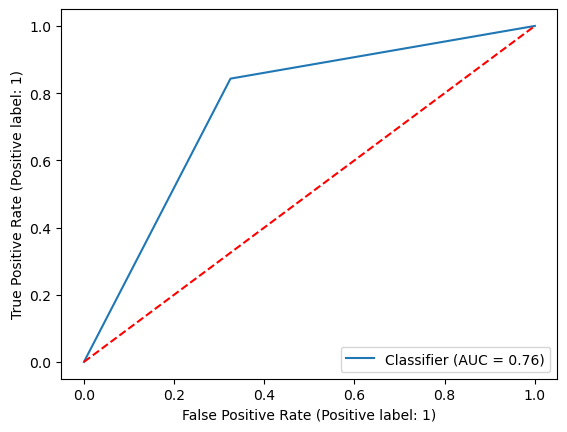

In [211]:
test_pred = cftree.predict(test_x)
RocCurveDisplay.from_predictions(test_y, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

### 11.3 Support vector <a id='11_3'>

In [213]:
svc_model = SVC()

In [214]:
svc_model.fit(train_x, train_y)

SVC()

In [215]:
full_classification_report(svc_model, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92        93
         1.0       0.95      0.92      0.93       118

    accuracy                           0.92       211
   macro avg       0.92      0.93      0.92       211
weighted avg       0.93      0.92      0.92       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76        39
         1.0       0.82      0.81      0.82        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



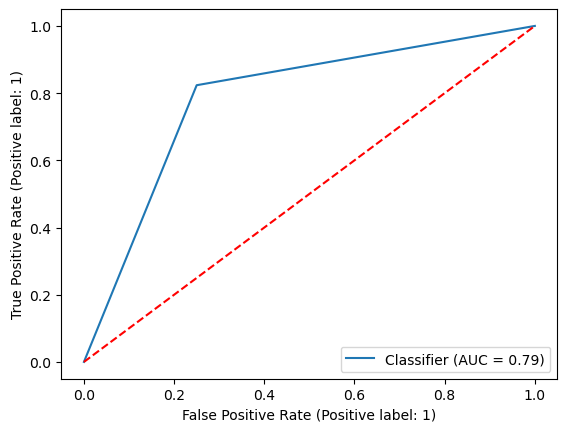

In [216]:
test_pred = svc_model.predict(test_x)
RocCurveDisplay.from_predictions(test_y, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

### 11.4 RandomForest<a id='11_4'>

In [217]:
forest = RandomForestClassifier()

In [218]:
forest.fit(train_x,train_y)

RandomForestClassifier()

In [219]:
full_classification_report(forest, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00       114

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        40
         1.0       0.76      0.76      0.76        51

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



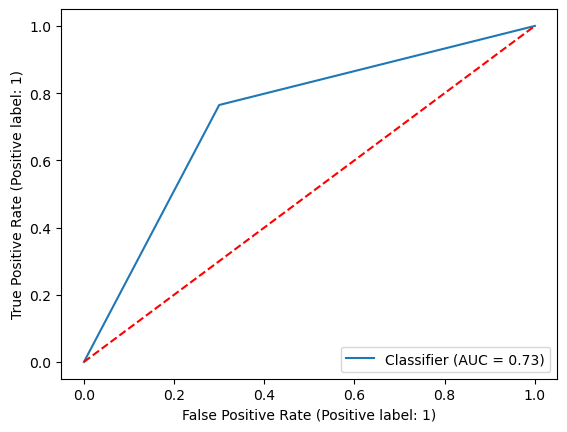

In [220]:
test_pred = forest.predict(test_x)
RocCurveDisplay.from_predictions(test_y, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

In [225]:
params = {
    'n_estimators':[50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [232]:
forest_new = RandomForestClassifier()

In [233]:
forest_grid = GridSearchCV(forest_new, param_grid=params)

In [235]:
forest_grid.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [236]:
best_params = forest_grid.best_params_
best_params


{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 150}

In [237]:
forest2 = RandomForestClassifier(**best_params)

In [238]:
forest2.fit(train_x,train_y)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=150)

In [239]:
full_classification_report(forest2, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00       114

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.70      0.67      0.68        42
         1.0       0.73      0.76      0.74        49

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



### 11.5 XGBoost <a id='11_5'>

In [241]:
xg_model = xgb.XGBClassifier(objective='binary:logistic', random_state=30)

In [244]:
xg_model.fit(train_x,train_y, eval_set=[test_set], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [247]:
full_classification_report(xg_model, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       114

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        40
           1       0.75      0.75      0.75        51

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



In [258]:
params = {'learning_rate': [0.001, 0.00065, 0.00075],
          'max_depth': [3,5,7],
          'n_estimators': [200, 300, 400]}

In [259]:
xg2 = xgb.XGBClassifier(objective='binary:logistic', random_state=30)

In [260]:
xg_grid = GridSearchCV(estimator=xg2, param_grid=params)

In [261]:
xg_grid.fit(train_x, train_y, eval_set=[test_set], verbose=False)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=30, ...),
             param_grid={'learning_rate': [0.001, 0.00065, 0.00075],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 300, 400]})

In [262]:
xg_grid.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 400}

In [263]:
xg_best = xgb.XGBRFClassifier(objective='binary:logistic', random_state=30, **xg_grid.best_params_)

In [264]:
xg_best.fit(train_x, train_y)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.001, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=400, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=30, ...)

In [265]:
full_classification_report(xg_best, train_set, test_set)

TRAINING
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.54      0.70       211

    accuracy                           0.54       211
   macro avg       0.50      0.27      0.35       211
weighted avg       1.00      0.54      0.70       211

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.56      0.72        91

    accuracy                           0.56        91
   macro avg       0.50      0.28      0.36        91
weighted avg       1.00      0.56      0.72        91



c:\Users\silva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\silva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\silva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\silva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

### 11.6 Neural Network <a id='11_6'>

In [528]:
check_path = './model_saves/weights/cp.ckpt'
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           start_from_epoch=200,
                           verbose=1,
                           restore_best_weights=True
                        )

checkpoint = ModelCheckpoint(check_path, 
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only = True,
                             save_freq='epoch',
                             initial_value_threshold=0.7
                             )

callback_list = [checkpoint, early_stop]

In [270]:
train_x.shape

(211, 16)

In [535]:
##nn model for modified and removed set
def make_nn():
    input_tensor = Input(shape=(16,))
    x = Dense(20, kernel_regularizer=L2(0.004))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.8)(x)

    x = Dense(20, kernel_regularizer=L2(0.004))(x)   
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.8)(x)

    x = Dense(20, kernel_regularizer=L2(0.004))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.8)(x)

    
    x = Dense(1, activation='sigmoid', kernel_regularizer=L2(0.01))(x)
    model = Model(inputs=input_tensor, outputs=x)
    return model

In [536]:
nn_model = make_nn()

In [537]:
nn_model.compile(optimizer=RMSprop(0.00075),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [538]:
nn_model.fit(train_x,train_y, epochs=3000, validation_data=(test_x,test_y), callbacks=callback_list)

Epoch 1/3000


1/7 [===>..........................] - ETA: 5s - loss: 1.3464 - accuracy: 0.4375
Epoch 1: val_accuracy did not improve from 0.85714
7/7 [==============================] - 1s 32ms/step - loss: 1.2741 - accuracy: 0.5071 - val_loss: 0.9512 - val_accuracy: 0.5385
Epoch 2/3000
1/7 [===>..........................] - ETA: 0s - loss: 1.3955 - accuracy: 0.6250
Epoch 2: val_accuracy did not improve from 0.85714
7/7 [==============================] - 0s 6ms/step - loss: 1.2586 - accuracy: 0.5261 - val_loss: 0.9481 - val_accuracy: 0.5604
Epoch 3/3000
1/7 [===>..........................] - ETA: 0s - loss: 1.1904 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.85714
7/7 [==============================] - 0s 6ms/step - loss: 1.3196 - accuracy: 0.5024 - val_loss: 0.9466 - val_accuracy: 0.5604
Epoch 4/3000
1/7 [===>..........................] - ETA: 0s - loss: 1.1450 - accuracy: 0.4375
Epoch 4: val_accuracy did not improve from 0.85714
7/7 [==============================] - 0s 6ms/step 

In [2]:
import tensorflow as tf

In [3]:
nn_model = tf.keras.models.load_model('./model_saves/nn_model2.h5')

In [12]:
nn_model.evaluate(train_x,train_y)

7/7 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8673


[0.4297514855861664, 0.8672986030578613]

In [13]:
nn_model.evaluate(test_x,test_y)

3/3 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8681


[0.46540552377700806, 0.8681318759918213]

## 12. Model training using all variables <a id='12'>

In [211]:
#use this to skip steps
dummy2 = pd.read_csv('all_var_encoded.csv')

In [212]:
x2 = dummy2.drop('output', axis=1)
y2 = dummy2['output']

train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.3, random_state=30)
train_set2 = (train_x2, train_y2)
test_set2 = (test_x2, test_y2)

In [91]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [95]:
df.to_csv('data_clean.csv', index=None)

In [96]:
CATEGORICAL

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [97]:
NUMERIC

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [99]:
CATEGORICAL.remove('output')

ValueError: list.remove(x): x not in list

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sd_scale = StandardScaler()

In [102]:
df2 = df.copy()

In [103]:
df2.loc[:, NUMERIC] = sd_scale.fit_transform(df2[NUMERIC])

In [104]:
df2.head()

age  sex  cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.952197    1   3  0.763956 -0.256334    1        0  0.015443     0   
1 -1.915313    1   2 -0.092738  0.072199    0        1  1.633471     0   
2 -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514     0   
3  0.180175    1   1 -0.663867 -0.198357    0        1  1.239897     0   
4  0.290464    0   0 -0.663867  2.082050    0        1  0.583939     1   

    oldpeak  slp  caa  thall  output  
0  1.087338    0    0      1       1  
1  2.122573    0    0      2       1  
2  0.310912    2    0      2       1  
3 -0.206705    2    0      2       1  
4 -0.379244    2    0      2       1

In [105]:
for c in CATEGORICAL:
    print(f'{c} Uniques = {df2[c].unique()}')

sex Uniques = [1 0]
cp Uniques = [3 2 1 0]
fbs Uniques = [1 0]
restecg Uniques = [0 1 2]
exng Uniques = [0 1]
slp Uniques = [0 2 1]
caa Uniques = [0 2 1 3]
thall Uniques = [1 2 3]


In [106]:
DONT_DUMMY = ['sex', 'fbs', 'exng']

In [107]:
CATS2 = [x for x in CATEGORICAL if x not in DONT_DUMMY]

In [108]:
CATS2

['cp', 'restecg', 'slp', 'caa', 'thall']

In [109]:
dummy2 = pd.get_dummies(df2, columns=CATS2)

In [110]:
dummy2

age  sex    trtbps      chol  fbs  thalachh  exng   oldpeak  output  \
0    0.952197    1  0.763956 -0.256334    1  0.015443     0  1.087338       1   
1   -1.915313    1 -0.092738  0.072199    0  1.633471     0  2.122573       1   
2   -1.474158    0 -0.092738 -0.816773    0  0.977514     0  0.310912       1   
3    0.180175    1 -0.663867 -0.198357    0  1.239897     0 -0.206705       1   
4    0.290464    0 -0.663867  2.082050    0  0.583939     1 -0.379244       1   
..        ...  ...       ...       ...  ...       ...   ...       ...     ...   
298  0.290464    0  0.478391 -0.101730    0 -1.165281     1 -0.724323       0   
299 -1.033002    1 -1.234996  0.342756    0 -0.771706     0  0.138373       0   
300  1.503641    1  0.706843 -1.029353    1 -0.378132     0  2.036303       0   
301  0.290464    1 -0.092738 -2.227533    0 -1.515125     1  0.138373       0   
302  0.290464    0 -0.092738 -0.198357    0  1.064975     0 -0.896862       0   

      cp_0  ...  slp_0  slp_1  slp_2  caa_0  caa_1  caa_2  caa_3  thall_1  \
0    False  ...   True  False  False   True  False  False  False     True   
1    False  ...   True  False  False   True  False  False  False    False   
2    False  ...  False  False   True   True  False  False  False    False   
3    False  ...  False  False   True   True  False  False  False    False   
4     True  ...  False  False   True   True  False  False  False    False   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...      ...   
298   True  ...  False   True  False   True  False  False  False    False   
299  False  ...  False   True  False   True  False  False  False    False   
300   True  ...  False   True  False  False  False   True  False    False   
301   True  ...  False   True  False  False   True  False  False    False   
302  False  ...  False   True  False  False   True  False  False    False   

     thall_2  thall_3  
0      False    False  
1       True    False  
2       True    False  
3       True    False  
4       True    False  
..       ...      ...  
298    False     True  
299    False     True  
300    False     True  
301    False     True  
302     True    False  

[303 rows x 26 columns]

### 12.1 Logistic Regression<a id='12_1'>

In [235]:
log2 = LogisticRegression()

In [236]:
log2.fit(train_x2, train_y2)

LogisticRegression()

In [246]:
full_classification_report(log2, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        89
           1       0.93      0.86      0.89       123

    accuracy                           0.88       212
   macro avg       0.88      0.89      0.88       212
weighted avg       0.89      0.88      0.88       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



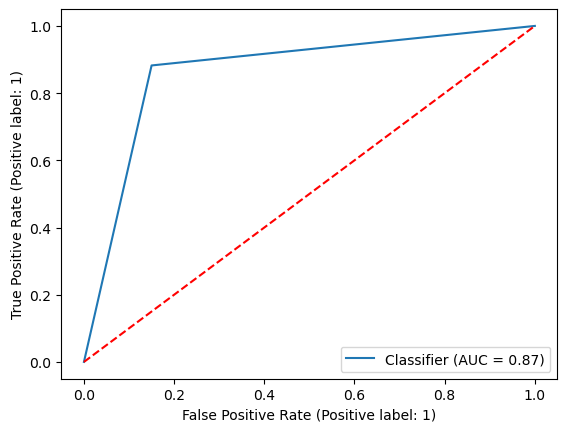

In [128]:
test_pred = log2.predict(test_x2)
RocCurveDisplay.from_predictions(test_y2, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

In [129]:
params={
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
    
}

In [130]:
new_log = LogisticRegression()

In [131]:
log_grid = GridSearchCV(new_log, param_grid=params)

In [ ]:
log_grid.fit(train_x2, train_y2)

In [133]:
log_grid.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [134]:
log_grid.best_score_

0.8488372093023255

In [135]:
new_log = LogisticRegression(penalty='l2', solver='liblinear')

In [136]:
new_log.fit(train_x2, train_y2)

LogisticRegression(solver='liblinear')

In [137]:
full_classification_report(new_log, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        89
           1       0.93      0.86      0.89       123

    accuracy                           0.88       212
   macro avg       0.88      0.89      0.88       212
weighted avg       0.89      0.88      0.88       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



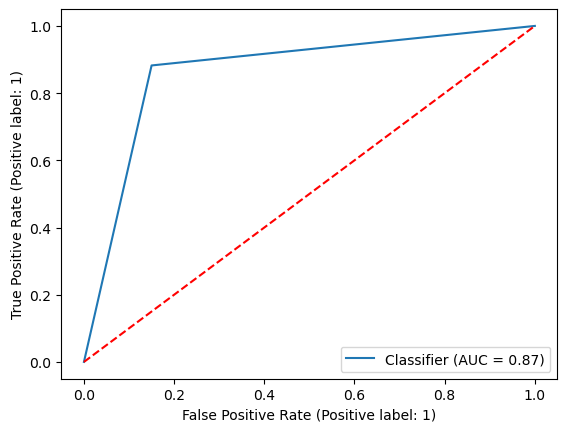

In [138]:
test_pred = new_log.predict(test_x2)
RocCurveDisplay.from_predictions(test_y2, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

### 12.2 Decision Trees<a id='12_2'>

In [139]:
cftree = DecisionTreeClassifier()

In [140]:
cftree.fit(train_x2, train_y2)

DecisionTreeClassifier()

In [141]:
full_classification_report(cftree, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       114

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        46
           1       0.67      0.76      0.71        45

    accuracy                           0.69        91
   macro avg       0.70      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91



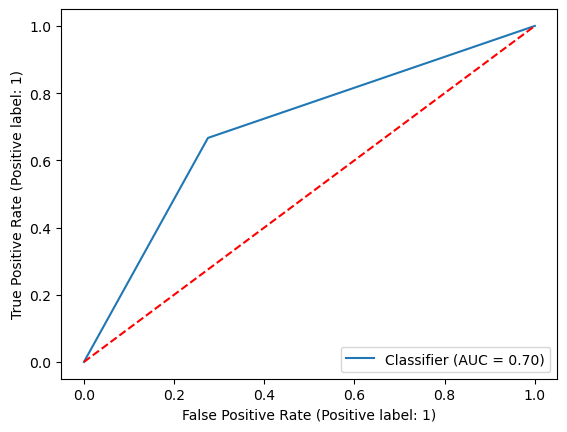

In [142]:
test_pred = cftree.predict(test_x2)
RocCurveDisplay.from_predictions(test_y2, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

In [168]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': list(range(1,11,2)),
          'min_samples_leaf': list(range(5,36,5)),
          'min_samples_split': list(range(10,51,10))
          }

In [169]:
cftree2 = DecisionTreeClassifier()

In [170]:
cf_grid = GridSearchCV(cftree2, param_grid=params)

In [171]:
cf_grid.fit(train_x2,train_y2)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [172]:
cf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [173]:
cf2 = DecisionTreeClassifier(**cf_grid.best_params_)

In [174]:
cf2.fit(train_x2,train_y2)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [175]:
full_classification_report(cf2, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        92
           1       0.89      0.84      0.86       120

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.86      0.85      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



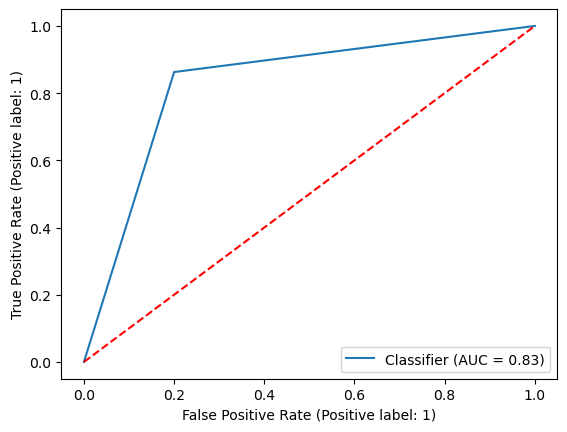

In [176]:
test_pred = cf2.predict(test_x2)
RocCurveDisplay.from_predictions(test_y2, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

### 12.3 Support Vector<a id='12_3'>

In [147]:
sv2 = SVC()

In [148]:
sv2.fit(train_x2,train_y2)

SVC()

In [149]:
full_classification_report(sv2, train_set2,test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        91
           1       0.96      0.90      0.93       121

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [141]:
params = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
          'degree': [1],
          }

In [136]:
sv_new = SVC()

In [142]:
sv_grid = GridSearchCV(sv_new, param_grid=params)

In [143]:
sv_grid.fit(train_x2, train_y2)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']})

In [144]:
sv_grid.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [146]:
full_classification_report(sv_grid.best_estimator_, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        91
           1       0.96      0.90      0.93       121

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



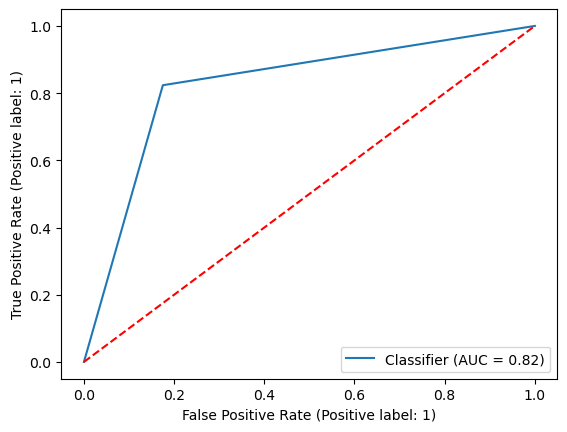

In [150]:
test_pred = sv2.predict(test_x2)
RocCurveDisplay.from_predictions(test_y2, test_pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()

### 12.4 RandomForest<a id='12_4'>

In [211]:
forest2 = RandomForestClassifier(bootstrap=True, max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=20)

In [212]:
forest2.fit(train_x2,train_y2)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                       random_state=20)

In [214]:
full_classification_report(forest2, train_set2,test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        88
           1       0.91      0.84      0.87       124

    accuracy                           0.86       212
   macro avg       0.85      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.86      0.90      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [5]:
params = {
    'n_estimators':[50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [20,30,40],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [6]:
forest_grid = GridSearchCV(RandomForestClassifier(random_state=30), param_grid=params)

In [7]:
forest_grid.fit(train_x2,train_y2)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100, 150, 200]})

In [8]:
forest_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 150}

In [11]:
full_classification_report(forest_grid.best_estimator_, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        94
           1       0.89      0.86      0.87       118

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.86      0.92      0.89        48

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



### 12.5 XGBoost<a id='12_5'>

In [12]:
xg2 = xgb.XGBClassifier(objective='binary:logistic', random_state=30)

In [13]:
xg2.fit(train_x2,train_y2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [14]:
full_classification_report(xg2, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       114

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [42]:
params = {'learning_rate': [0.00075, 0.00045, 0.00025, 0.001],
          'max_depth': [3,5,7,10],
          'n_estimators': [600, 700, 800, 900]}

In [43]:
xg_grid = GridSearchCV(xgb.XGBClassifier(n_jobs=12, random_state=30, objective='binary:logistic'), param_grid=params)

In [44]:
xg_grid.fit(train_x2, train_y2)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=12, num_parallel_tree=None,
                                     random_state=30, ...),
             param_grid={'learning_rate': [0.00075, 0.00045, 0.00025, 0.001],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [400, 500, 600]})

In [45]:
xg_grid.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 600}

In [46]:
xg_grid.best_score_

0.8111849390919158

In [47]:
xg_best = xgb.XGBClassifier(n_jobs=12, random_state=30, objective='binary:logistic', **xg_grid.best_params_)

In [48]:
xg_best.fit(train_x2, train_y2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=12,
              num_parallel_tree=None, random_state=30, ...)

In [49]:
full_classification_report(xg_best, train_set2, test_set2)

TRAINING
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        81
           1       0.97      0.85      0.91       131

    accuracy                           0.89       212
   macro avg       0.88      0.91      0.89       212
weighted avg       0.91      0.89      0.89       212

----------------------------------------------------------------------------------------------------
TESTING
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        34
           1       0.84      0.75      0.80        57

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.77      0.76      0.76        91



### 12.6 Neural Net<a id='12_6'>

In [50]:
train_x2.shape

(212, 25)

In [654]:
def make_net():
    input_tensor = Input(shape=(25,))

    x = Dense(64, kernel_regularizer=L2(0.095))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('tanh')(x)
    x = Dropout(0.5)(x)

    x = Dense(64, kernel_regularizer=L2(0.095))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_tensor, outputs=x)
    return model

In [690]:
nn_model = make_net()

In [762]:
nn_model.compile(optimizer=Adam(0.000025),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [444]:
for c in train_x2:
    train_x2.loc[:, c] = train_x2[c].astype(np.float32)

In [445]:
for c in test_x2:
    test_x2.loc[:, c] = test_x2[c].astype(np.float32)

In [763]:
check_path = './model_saves/weights/cp.ckpt'
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           start_from_epoch=200,
                           verbose=1,
                           restore_best_weights=True
                        )

checkpoint = ModelCheckpoint(check_path, 
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only = True,
                             save_freq='epoch',
                             initial_value_threshold=0.8
                             )

callback_list = [checkpoint, early_stop]

In [764]:
nn_model.fit(train_x2, train_y2, epochs=3000, validation_data=(test_x2, test_y2), callbacks=callback_list, batch_size=100)

Epoch 1/3000


1/3 [=========>....................] - ETA: 1s - loss: 3.0547 - accuracy: 0.3500
Epoch 1: val_accuracy did not improve from 0.80000
3/3 [==============================] - 1s 83ms/step - loss: 3.0456 - accuracy: 0.3585 - val_loss: 3.0403 - val_accuracy: 0.2967
Epoch 2/3000
1/3 [=========>....................] - ETA: 0s - loss: 3.0332 - accuracy: 0.4000
Epoch 2: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 15ms/step - loss: 3.0456 - accuracy: 0.3632 - val_loss: 3.0399 - val_accuracy: 0.2967
Epoch 3/3000
1/3 [=========>....................] - ETA: 0s - loss: 3.0421 - accuracy: 0.3200
Epoch 3: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 15ms/step - loss: 3.0403 - accuracy: 0.3349 - val_loss: 3.0396 - val_accuracy: 0.2967
Epoch 4/3000
1/3 [=========>....................] - ETA: 0s - loss: 3.0308 - accuracy: 0.3800
Epoch 4: val_accuracy did not improve from 0.80000
3/3 [==============================] - 0s 15ms/st

In [772]:
nn_model.load_weights(check_path)

In [773]:
nn_model.evaluate(train_x2,train_y2)

7/7 [==============================] - 0s 2ms/step - loss: 2.5955 - accuracy: 0.9151


[2.595457077026367, 0.9150943160057068]

In [774]:
nn_model.evaluate(test_x2, test_y2)

3/3 [==============================] - 0s 3ms/step - loss: 2.7018 - accuracy: 0.9231


[2.7018356323242188, 0.9230769276618958]

In [271]:
nn_model.save('./model_saves/nn_model_all_var_v7.h5')

c:\Users\silva\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [273]:
v1 = tf.keras.models.load_model('./model_saves/nn_model_all_var.h5')
v2 = tf.keras.models.load_model('./model_saves/nn_model_all_var_v2.h5')
v3 = tf.keras.models.load_model('./model_saves/nn_model_all_var_v3.h5')
v4 = tf.keras.models.load_model('./model_saves/nn_model_all_var_v4.h5')
v5 = tf.keras.models.load_model('./model_saves/nn_model_all_var_v5.h5')
v6 = tf.keras.models.load_model('./model_saves/nn_model_all_var_v6.h5')
v7 = tf.keras.models.load_model('./model_saves/nn_model_all_var_v7.h5')

In [198]:
print('Train')
print(v1.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v1.evaluate(test_x2,test_y2))

Train
1/7 [===>..........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8750

7/7 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8632
[0.3217885494232178, 0.8632075190544128]
--------------------------------------------------
Test
3/3 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.9011
[0.3438395857810974, 0.901098906993866]


In [199]:
print('Train')
print(v2.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v2.evaluate(test_x2,test_y2))

Train
1/7 [===>..........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

7/7 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9104
[0.24630312621593475, 0.9103773832321167]
--------------------------------------------------
Test
3/3 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8901
[0.340701162815094, 0.8901098966598511]


In [200]:
print('Train')
print(v3.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v3.evaluate(test_x2,test_y2))

Train


7/7 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8726
[0.3098795413970947, 0.8726415038108826]
--------------------------------------------------
Test
3/3 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.9011
[0.32536596059799194, 0.901098906993866]


In [201]:
print('Train')
print(v4.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v4.evaluate(test_x2,test_y2))

Train
7/7 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8821
[0.3249616026878357, 0.8820754885673523]
--------------------------------------------------
Test
3/3 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.9121
[0.32777684926986694, 0.9120879173278809]


In [202]:
print('Train')
print(v5.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v5.evaluate(test_x2,test_y2))

Train
7/7 [==============================] - 0s 2ms/step - loss: 1.5768 - accuracy: 0.9245
[1.576796531677246, 0.9245283007621765]
--------------------------------------------------
Test
3/3 [==============================] - 0s 2ms/step - loss: 1.6408 - accuracy: 0.9011
[1.640828013420105, 0.901098906993866]


In [203]:
print('Train')
print(v6.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v6.evaluate(test_x2,test_y2))

Train


7/7 [==============================] - 0s 2ms/step - loss: 2.5886 - accuracy: 0.9009
[2.588590621948242, 0.900943398475647]
--------------------------------------------------
Test
3/3 [==============================] - 0s 3ms/step - loss: 2.6283 - accuracy: 0.9011
[2.628340244293213, 0.901098906993866]


In [274]:
print('Train')
print(v7.evaluate(train_x2,train_y2))
print('-'*50)
print('Test')
print(v7.evaluate(test_x2,test_y2))

Train
7/7 [==============================] - 0s 3ms/step - loss: 2.8224 - accuracy: 0.9151
[2.822384834289551, 0.9150943160057068]
--------------------------------------------------
Test
3/3 [==============================] - 0s 3ms/step - loss: 2.8539 - accuracy: 0.9231
[2.8539159297943115, 0.9230769276618958]


In [204]:
pred = v6.predict(test_x2)

3/3 [==============================] - 0s 3ms/step


In [205]:
pred = np.where(pred >0.5, 1, 0)

In [216]:
train_set = (train_x2, train_y2)
test_set = (test_x2, test_y2)

In [308]:
full_classification_report(v7, train_set, test_set, neural_net=True)

7/7 [==============================] - 0s 1ms/step
TRAINING
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        90
           1       0.96      0.89      0.92       122

    accuracy                           0.92       212
   macro avg       0.91      0.92      0.91       212
weighted avg       0.92      0.92      0.92       212

----------------------------------------------------------------------------------------------------
TESTING
3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.94      0.92      0.93        52

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



In [252]:
v6.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 25)]              0         
                                                                 
 dense_30 (Dense)            (None, 128)               3328      
                                                                 
 batch_normalization_8 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                          

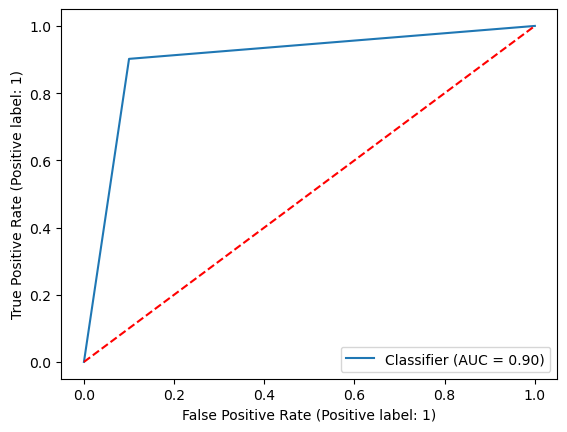

In [206]:
RocCurveDisplay.from_predictions(test_y2, pred)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()